In [2]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time

import pandas as pd
import numpy as np
from tabulate import tabulate


import scipy as sp
from scipy import stats

from IPython.display import HTML

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


%matplotlib inline

pd.set_option("display.max_columns",80)
warnings.filterwarnings("ignore")

In [3]:
traffic_column_names =['Recorded_Time','Received_Time','Serial_Number','Type','Subtype','Config_Version','Generated_Time',
               'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
               'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface',
               'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port',
               'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action','Bytes','Bytes_sent','Bytes_received',
               'Packets','Start_Time','Elapsed_Time','Category','Future_Use_1','Sequence_Number','Action_flags','Source_Location',
               'Destination_Location', 'Future_Use_2', 'Packets Sent', 'Packets Received', 'Session End Reason','Drop_1','Drop_2',
               'Drop_3','Drop_4','Drop_5','device_name','From_Policy','a','b','c','d','e','f','g']

threat_column_names=['Recorded_Time','Received_Time','Serial_Number','Type','Subtype', 'Config_Version','Generated_Time',
                     'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
                     'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface', 
                     'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port', 
                     'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action', 'Miscellaneous','Threat_ID', 
                     'Category', 'Severity', 'Direction','Sequence_Number', 'Action_Flags','Source_Location','Destination_Location',
                     'Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Something','Drop_46','Drop_47','Drop_48','Drop_49',
                     'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                     'device_name','Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_66','Drop_67','Drop_68',
                     'Detailed_Subtype','Something_2','From_Policy']

In [4]:
def read_logs(rel_path,compression=None,extension=None,column_names=None):
    path = rel_path
    zip_files = [f for f in os.listdir(path) if f.endswith(extension)]
    paths = [path + x for x in zip_files]
    df=pd.DataFrame()
    for i in range(0,len(paths)):
        try:
            demo_df=pd.read_csv(paths[i],header=None,infer_datetime_format=True,low_memory=True,
                                compression=compression,error_bad_lines=False,warn_bad_lines=False,memory_map=True)
        except:
            print(i,paths[i],"\n")
            continue
        if demo_df.empty!=True:
            df=df.append(demo_df)
        else:
            print("Not empty")
    df.columns=column_names
    return df

In [5]:
root_paths=['../../data/2018-01-02/','../../data/2018-01-03/','../../data/2018-01-04/',
            '../../data/2018-01-05/','../../data/2018-01-06/',
            '../../data/2018-01-07/','../../data/2018-01-08/','../../data/2018-01-09/','../../data/2018-01-10/','../../data/2018-01-11/',
            '../../data/2018-01-12/','../../data/2018-01-13/','../../data/2018-01-14/','../../data/2018-01-15/','../../data/2018-01-16/',
            '../../data/2018-01-17/','../../data/2018-01-18/','../../data/2018-01-19/','../../data/2018-01-20/','../../data/2018-01-21/',
            '../../data/2018-01-22/','../../data/2018-01-23/','../../data/2018-01-24/','../../data/2018-01-25/','../../data/2018-01-26/',
            '../../data/2018-01-27/']

In [6]:
threat_logs=pd.DataFrame()
for i in range(0,len(root_paths)):
    df2=(read_logs(root_paths[i],None,'Wireless-PA.csv',threat_column_names))
    threat_logs=pd.concat([threat_logs,df2])
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time,errors='coerce')
threat_logs.sort_values(by='Received_Time',inplace=True)
threat_logs.dropna(inplace=True,subset=['Source_User'])
threat_logs.reset_index(inplace=True,drop=True)
threat_logs.drop(['Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Drop_46','Drop_47','Drop_48','Drop_49',
                 'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                 'Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_65','Drop_66','Drop_67',
                 'Drop_68',
                 'NAT_Source_IP','NAT_Destination_IP','Rule_Name','Destination_User','Virtual_System',
                 'Log_Forwarding_Profile','NAT_Source_Port','NAT_Destination_Port','Action_Flags','From_Policy',
                 'Flags','Serial_Number','Config_Version','Source_Zone','Destination_Zone','Ingress_Interface',
                'Egress_Interface'],
                axis=1,inplace=True)

1 ../../data/2018-01-10/2018-01-10_17_Traffic_Wireless-PA.csv 



In [7]:
print("Length of Threat Logs:",len(threat_logs))
print("Number of unique users:",threat_logs.Source_User.nunique())

print("\nTop 10 Users who created threats:")
print(threat_logs.Source_User.value_counts()[0:9])

print("\nNumber of threats by Severity:")
print(threat_logs.Severity.value_counts())

Length of Threat Logs: 5648
Number of unique users: 637

Top 10 Users who created threats:
b5a502c0d5250f6fd302492ad4d6f33473e6991ac95080f0815ee3613613558a    1006
a90066f78f3b20df713d211fd336a49f24c4d89a22eff819624c16744623e871     300
bad693d8f1fbd7c5f24c56078ba9f3b2b60cc9b6f141d91d5071c56ff7c22a1e     206
1087cbd4bdfecd6fb9728441bfda913b8f3403c974ec5040a7444f86b2b8d5f7     180
cd25835ce040ee5bcde84d26b8315750cb5b02c01e170034e8d3d28fe27c3aac     166
d5d8a9d8dcf2cdf109ecde61bc39c36ed85fdb80b0f783c2d1d51475519329e7     158
271be6dd221205698a91c021260cf5bf4deb604945a2e8f03cb191cf5bd7403a     128
6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e     128
70799662994b10ddd0c9b6a89ac4263a7f100cd3268178b394a1aa9ae15bb396      97
Name: Source_User, dtype: int64

Number of threats by Severity:
medium      5550
high          81
critical      10
Name: Severity, dtype: int64


In [1]:
# traffic_logs_1_22=pd.DataFrame()
# for i in range(0,len(root_paths)):
#     print(root_paths[i])
#     df2=(read_logs(root_paths[i],'gzip','.gz',traffic_column_names))
#     traffic_logs_1_22=pd.concat([traffic_logs_1_22,df2])
# traffic_logs_1_22.drop(['a','b','c','d','e','f','g','From_Policy','Drop_1','Drop_2','Drop_3','Drop_4','Drop_5',
#                    'Future_Use_2','Action_flags','Future_Use_1','NAT_Source_Port','NAT_Destination_Port',
#                    'NAT_Source_IP','NAT_Destination_IP','Rule_Name','Destination_User','Virtual_System',
#                    'Log_Forwarding_Profile','Serial_Number','Config_Version','Source_Zone','Destination_Zone',
#                    'Ingress_Interface','Egress_Interface'],axis=1,inplace=True)
# traffic_logs_1_22.Received_Time=pd.to_datetime(traffic_logs_1_22.Received_Time,errors='coerce')
# traffic_logs_1_22.sort_values(by='Received_Time',inplace=True)
# traffic_logs_1_22.dropna(inplace=True,subset=['Source_User'])
# traffic_logs_1_22.reset_index(inplace=True,drop=True)
# len(traffic_logs_1_22)

In [43]:
traffic_logs_1_22.to_csv('Traffic_1_27.csv',index=False)

### Matching records for Jan

In [7]:
traffic_logs=pd.read_csv('Traffic_1_27.csv',usecols=['Source_User','Received_Time','Source_IP','Destination_IP'])

In [8]:
print("Unique users in threat  logs:",threat_logs.Source_User.nunique())
print("Unique users in traffic logs:",traffic_logs.Source_User.nunique())

Unique users in threat  logs: 637
Unique users in traffic logs: 48804


In [9]:
b=threat_logs.Source_User.unique()
count=0
c=traffic_logs.Source_User.unique()
d=[]
for i in range(0,len(b)):
    if b[i] not in c:
        count=count+1
        print(b[i])
        d.append(b[i])
    else:
        continue
for i in range(0,len(d)):
    threat_logs=threat_logs[threat_logs.Source_User!=d[i]]

a055b350f9f92883b160fd9b1e0a7b3858bcd
fda68e0ab6d63ba1204143178078d3f5362b418ecf9b729bd001ab282c6322e2
c5f4941aea7e26724ca5dc05f47d4be0e77da67d7
71eaae8e5dc4ff5b389210041b19f226
68f27382ca37f159
59a5693ff4a8b31e77a74288bf19b948dd521d7b4b40e16a13c534f71


In [10]:
threat_logs.Source_User.nunique()

631

In [11]:
x=traffic_logs[traffic_logs.Source_User.isin(threat_logs.Source_User.unique())]
x=x[['Source_User','Received_Time','Source_IP','Destination_IP']]

In [12]:
x_threat=threat_logs[['Source_User','Received_Time','Source_IP','Destination_IP']]

In [13]:
x.Received_Time=pd.to_datetime(x.Received_Time,errors='coerce')

In [14]:
x_threat.Received_Time=pd.to_datetime(x_threat.Received_Time,errors='coerce')

In [15]:
widgets = ['Test: ', Percentage(), ' ',Bar(marker='|',left='[',right=']'),' ', ETA(), ' ', FileTransferSpeed()]
pbar = ProgressBar(widgets=widgets, maxval=len(threat_logs))
    

threat_sub_logs=x_threat.iloc[:,:]
threat_df=pd.DataFrame(columns=['User','Reason'])
ls=[]
count_no_date=0
count_no_time=0
count_no_time_min=0
corner_case=0
main=0
index_matched=[]
not_matched=[]

c=0

pbar.start()

for i in range(0,len(threat_sub_logs)):
    threat=threat_sub_logs.iloc[i,:]
    ### Match User
    filter_user=x[x.Source_User==threat.Source_User]    

    ### Filter Date for present day and a day before as threat might be recorded later       
    if((threat.Received_Time.month==1)&(threat.Received_Time.day==2)):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==1)) | 
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==12))| 
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==1)) |
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour) & (filter_user.Received_Time.dt.month==12))|
                              ((filter_user.Received_Time.dt.day==3)  & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour) & (filter_user.Received_Time.dt.month==1)) ]
    
    elif((threat.Received_Time.day==1)&(threat.Received_Time.month in [3,5,7,8,10,12])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month-1))| 
                              ((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  |
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour)     & (filter_user.Received_Time.dt.month==threat.Received_Time.month-1))|
                              ((filter_user.Received_Time.dt.day==3)  & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour)     & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  ]
        
    elif((threat.Received_Time.day==2)&(threat.Received_Time.month in [3,5,7,8,10,12])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) | 
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) | 
                              ((filter_user.Received_Time.dt.day==3)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) |
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour)    & (filter_user.Received_Time.dt.month==threat.Received_Time.month-1))|
                              ((filter_user.Received_Time.dt.day==4)  & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour)    & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  ]
        
    elif((threat.Received_Time.day==2)&(threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) | 
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) | 
                              ((filter_user.Received_Time.dt.day==31) & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour)    & (filter_user.Received_Time.dt.month==threat.Received_Time.month-1))|
                              ((filter_user.Received_Time.dt.day==3)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) |
                              ((filter_user.Received_Time.dt.day==4)  & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour)    & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) ]
        
    elif((threat.Received_Time.day==1)&(threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==31) & (filter_user.Received_Time.dt.month==threat.Received_Time.month-1))| 
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month-1) & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  |
                              ((filter_user.Received_Time.dt.day==3)  & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour)     & (filter_user.Received_Time.dt.month==threat.Received_Time.month))]
    
    
    elif((threat.Received_Time.month==12)&(threat.Received_Time.day==31)):   
        filter_48=filter_user[((filter_user.Received_Time.dt.day==31) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)   & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1))|
                              ((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1) & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    elif((threat.Received_Time.month==12)&(threat.Received_Time.day==30)): 
        filter_48=filter_user[((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) | 
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) | 
                              ((filter_user.Received_Time.dt.day==28) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)  & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==31) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)) |
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==1)                           & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
       
    elif((threat.Received_Time.day==31)&(threat.Received_Time.month!=12)):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==31) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)   & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1))|
                              ((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1) & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    elif((threat.Received_Time.day==30) & (threat.Received_Time.month in [1,5,7,8,10])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==28) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)   & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==31) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  |
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1) & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    elif((threat.Received_Time.day==30) & (threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))   | 
                              ((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))   | 
                              ((filter_user.Received_Time.dt.day==28) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)    & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1)) |
                              ((filter_user.Received_Time.dt.day==2)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1)  & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour)) ]
        
    elif((threat.Received_Time.day==29) & (threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[((filter_user.Received_Time.dt.day==29) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==28) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==27) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)   & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==30) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  |
                              ((filter_user.Received_Time.dt.day==1)  & (filter_user.Received_Time.dt.month==threat.Received_Time.month+1) & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
    else:
        filter_48=filter_user[((filter_user.Received_Time.dt.day==threat.Received_Time.day)   & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==threat.Received_Time.day-1) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  | 
                              ((filter_user.Received_Time.dt.day==threat.Received_Time.day-2) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)   & (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              ((filter_user.Received_Time.dt.day==threat.Received_Time.day+1) & (filter_user.Received_Time.dt.month==threat.Received_Time.month))  |
                              ((filter_user.Received_Time.dt.day==threat.Received_Time.day+2) & (filter_user.Received_Time.dt.month==threat.Received_Time.month)   & (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    

    filter_ip=filter_48[(filter_48.Source_IP==threat.Source_IP) | (filter_48.Destination_IP==threat.Destination_IP)]
    
    
        
    if len(filter_ip)==0:
        not_matched.append(i)
        ls.append([threat.Source_User,"Mismatch"])
    else:
        a=(threat.Received_Time-filter_ip.Received_Time).argmin()
        index_matched.append(a)
        ls.append([threat.Source_User,"Found"])  
        
    time.sleep(0.01)
    pbar.update(i+1)
pbar.finish()

Test: 100% [||||||||||||||||||||||||||||||||||||||||||] Time: 0:47:13   2.0 B/s


In [16]:
threat_df=pd.DataFrame(ls)
threat_df[1].value_counts()

Found       5581
Mismatch       9
Name: 1, dtype: int64

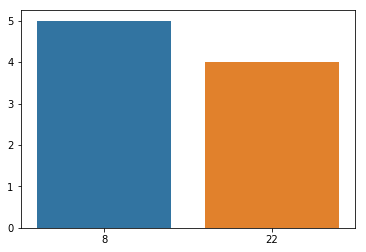

In [17]:
not_found=threat_df[threat_df[1]!='Found']
a=not_found.index.get_values()
not_found_df=threat_logs.iloc[a,:]
sns.barplot(x=not_found_df.Received_Time.dt.day.value_counts().index,y=not_found_df.Received_Time.dt.day.value_counts().values)

In [18]:
not_found[0].value_counts()

c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff    4
2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e    2
70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc    2
b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997    1
Name: 0, dtype: int64

In [19]:
threat_logs.reset_index(inplace=True,drop=True)

### Logs which are not matched

In [20]:
p=threat_logs.iloc[not_matched,:]
p

,Recorded_Time,Received_Time,Type,Subtype,Generated_Time,Source_IP,Destination_IP,Source_User,Application,Future_Use,Session_ID,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Miscellaneous,Threat_ID,Category,Severity,Direction,Sequence_Number,Source_Location,Destination_Location,Something,device_name,Detailed_Subtype,Something_2
1744,Jan 8 11:18:00 ptx-wireless-pa1.umd.edu 1,2018-01-08 11:17:59,THREAT,spyware,2018/01/08 11:17:59,10.105.56.131,74.117.199.102,2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5f...,web-browsing,2018/01/08 11:17:59,34529984.0,1.0,56502.0,80.0,tcp,reset-both,ad.afy11.net/ad?mode=7&publisher_dsp_id=91&ext...,berbew.jb C2 traffic(192730665),any,medium,client-to-server,703514310.0,UMD Private Network,United States,1.0,ptx-wireless-pa1,autogen,Antivirus-2485-2979
1745,Jan 8 11:18:00 ptx-wireless-pa1.umd.edu 1,2018-01-08 11:18:00,THREAT,spyware,2018/01/08 11:18:00,10.105.56.131,74.117.199.102,2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5f...,web-browsing,2018/01/08 11:18:00,503485.0,2.0,56519.0,80.0,tcp,reset-both,ad.afy11.net/ad?mode=7&publisher_dsp_id=91&ext...,berbew.jb C2 traffic(192730665),any,medium,client-to-server,703514311.0,UMD Private Network,United States,1.0,ptx-wireless-pa1,autogen,Antivirus-2485-2979
1848,Jan 8 13:44:31 css-wireless-pa1.umd.edu 1,2018-01-08 13:44:30,THREAT,spyware,2018/01/08 13:44:30,10.104.195.229,128.8.74.2,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,dns,2018/01/08 13:44:30,35098080.0,1.0,19690.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:cryptoloot.pro)(...,any,medium,client-to-server,645241473.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-2485-2979
1849,Jan 8 13:48:35 css-wireless-pa1.umd.edu 1,2018-01-08 13:48:35,THREAT,spyware,2018/01/08 13:48:35,10.104.195.229,128.8.74.2,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,dns,2018/01/08 13:48:35,269255.0,1.0,17612.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:cryptoloot.pro)(...,any,medium,client-to-server,645241494.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-2485-2979
1871,Jan 8 14:22:55 css-wireless-pa1.umd.edu 1,2018-01-08 14:22:54,THREAT,spyware,2018/01/08 14:22:54,10.104.189.163,128.8.76.2,b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96...,dns,2018/01/08 14:22:54,35125254.0,1.0,49430.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:npdaqy6x1j.me)(1...,any,medium,client-to-server,645241828.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-2485-2979
4574,Jan 22 21:22:03 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:03,THREAT,spyware,2018/01/22 21:22:03,10.104.100.49,54.149.215.238,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:03,67856105.0,1.0,47817.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409266.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993
4575,Jan 22 21:22:04 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:04,THREAT,spyware,2018/01/22 21:22:04,10.104.100.49,54.149.227.132,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:04,33830342.0,1.0,39945.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409268.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993
4576,Jan 22 21:22:04 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:04,THREAT,spyware,2018/01/22 21:22:04,10.104.100.49,34.215.83.190,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:04,34635622.0,1.0,39391.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409267.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993
4577,Jan 22 21:22:04 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:04,THREAT,spyware,2

#### 1.  For user b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997 - Matched  1 record within 96 hours

In [22]:
print("The threat log for user b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997  which did not match")
p[p.Source_User=='b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997']

The threat log for user b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997  which did not match


,Recorded_Time,Received_Time,Type,Subtype,Generated_Time,Source_IP,Destination_IP,Source_User,Application,Future_Use,Session_ID,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Miscellaneous,Threat_ID,Category,Severity,Direction,Sequence_Number,Source_Location,Destination_Location,Something,device_name,Detailed_Subtype,Something_2
1871,Jan 8 14:22:55 css-wireless-pa1.umd.edu 1,2018-01-08 14:22:54,THREAT,spyware,2018/01/08 14:22:54,10.104.189.163,128.8.76.2,b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96...,dns,2018/01/08 14:22:54,35125254.0,1.0,49430.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:npdaqy6x1j.me)(1...,any,medium,client-to-server,645241828.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-2485-2979


In [26]:
print("The traffic logs for user b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997  within a period of 96 hours +/- with either the source Ip or destination Ip")
x[(x.Source_User=='b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997')
             &( (x.Received_Time.dt.day==8) | (x.Received_Time.dt.day==9) |
                 (x.Received_Time.dt.day==10) |(x.Received_Time.dt.day==11) |(x.Received_Time.dt.day==12)
             | (x.Received_Time.dt.day==7)| (x.Received_Time.dt.day==6)| (x.Received_Time.dt.day==5)|(x.Received_Time.dt.day==4))
            &((x.Source_IP=='10.104.189.163	') | (x.Destination_IP=='128.8.76.2'))]


The traffic logs for user b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96936af1c90f40b4e997  within a period of 96 hours +/- with either the source Ip or destination Ip


,Source_User,Received_Time,Source_IP,Destination_IP
3407007,b9aeea8689208588acb10d5ae7508b28a1bcfbd38bca96...,2018-01-05 15:50:11,10.104.189.163,128.8.76.2


#### 2. For user 70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc - Matched 2 record 96 hour

In [27]:
print("The threat log for user 70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc which did not match")
p[p.Source_User=='70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc']

The threat log for user 70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc which did not match


,Recorded_Time,Received_Time,Type,Subtype,Generated_Time,Source_IP,Destination_IP,Source_User,Application,Future_Use,Session_ID,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Miscellaneous,Threat_ID,Category,Severity,Direction,Sequence_Number,Source_Location,Destination_Location,Something,device_name,Detailed_Subtype,Something_2
1848,Jan 8 13:44:31 css-wireless-pa1.umd.edu 1,2018-01-08 13:44:30,THREAT,spyware,2018/01/08 13:44:30,10.104.195.229,128.8.74.2,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,dns,2018/01/08 13:44:30,35098080.0,1.0,19690.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:cryptoloot.pro)(...,any,medium,client-to-server,645241473.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-2485-2979
1849,Jan 8 13:48:35 css-wireless-pa1.umd.edu 1,2018-01-08 13:48:35,THREAT,spyware,2018/01/08 13:48:35,10.104.195.229,128.8.74.2,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,dns,2018/01/08 13:48:35,269255.0,1.0,17612.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:cryptoloot.pro)(...,any,medium,client-to-server,645241494.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-2485-2979


In [28]:
print("The traffic logs for user 70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc within a period of 96 hours +/- with either the source Ip or destination Ip")
x[(x.Source_User=='70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc')
             &( (x.Received_Time.dt.day==8)   | (x.Received_Time.dt.day==9)  | (x.Received_Time.dt.day==10) |
                (x.Received_Time.dt.day==11)  | (x.Received_Time.dt.day==12) | (x.Received_Time.dt.day==7)  | 
                (x.Received_Time.dt.day==6)   | (x.Received_Time.dt.day==5)  | (x.Received_Time.dt.day==4))
            &((x.Source_IP=='10.104.195.229	') | (x.Destination_IP=='128.8.74.2'))]


The traffic logs for user 70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3af6287c95711096aabc within a period of 96 hours +/- with either the source Ip or destination Ip


,Source_User,Received_Time,Source_IP,Destination_IP
3114958,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 09:56:19,10.104.195.229,128.8.74.2
3124105,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 09:56:49,10.104.195.229,128.8.74.2
3130350,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 09:57:20,10.104.195.229,128.8.74.2
3130470,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 09:57:21,10.104.195.229,128.8.74.2
3150448,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 09:59:47,10.104.195.229,128.8.74.2
3158084,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 10:00:02,10.104.195.229,128.8.74.2
3162966,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 10:56:47,10.104.195.229,128.8.74.2
3171315,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 10:57:21,10.104.195.229,128.8.74.2
3195986,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 10:59:39,10.104.195.229,128.8.74.2
3212839,70a5b471c00ebb4422d2b398277e6fa39675c90ebc7d3a...,2018-01-05 11:57:02,10.104.195.229,128.8.74.2


#### 3. For user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e - Not matched the two records

In [29]:
print("The threat log for user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e which did not match")
p[p.Source_User=='2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e']

The threat log for user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e which did not match


,Recorded_Time,Received_Time,Type,Subtype,Generated_Time,Source_IP,Destination_IP,Source_User,Application,Future_Use,Session_ID,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Miscellaneous,Threat_ID,Category,Severity,Direction,Sequence_Number,Source_Location,Destination_Location,Something,device_name,Detailed_Subtype,Something_2
1744,Jan 8 11:18:00 ptx-wireless-pa1.umd.edu 1,2018-01-08 11:17:59,THREAT,spyware,2018/01/08 11:17:59,10.105.56.131,74.117.199.102,2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5f...,web-browsing,2018/01/08 11:17:59,34529984.0,1.0,56502.0,80.0,tcp,reset-both,ad.afy11.net/ad?mode=7&publisher_dsp_id=91&ext...,berbew.jb C2 traffic(192730665),any,medium,client-to-server,703514310.0,UMD Private Network,United States,1.0,ptx-wireless-pa1,autogen,Antivirus-2485-2979
1745,Jan 8 11:18:00 ptx-wireless-pa1.umd.edu 1,2018-01-08 11:18:00,THREAT,spyware,2018/01/08 11:18:00,10.105.56.131,74.117.199.102,2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5f...,web-browsing,2018/01/08 11:18:00,503485.0,2.0,56519.0,80.0,tcp,reset-both,ad.afy11.net/ad?mode=7&publisher_dsp_id=91&ext...,berbew.jb C2 traffic(192730665),any,medium,client-to-server,703514311.0,UMD Private Network,United States,1.0,ptx-wireless-pa1,autogen,Antivirus-2485-2979


In [31]:
print("The traffic logs for user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e within a period of 96 hours +/- with either the source Ip or destination Ip")
x[(x.Source_User=='2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e')
          &( (x.Received_Time.dt.day==8)   | (x.Received_Time.dt.day==9)  | (x.Received_Time.dt.day==10) |
             (x.Received_Time.dt.day==11)  | (x.Received_Time.dt.day==12) | (x.Received_Time.dt.day==7)  | 
             (x.Received_Time.dt.day==6)   | (x.Received_Time.dt.day==5)  | (x.Received_Time.dt.day==4))
            &((x.Source_IP=='10.105.56.131') | (x.Destination_IP=='74.117.199.102'))]
             

The traffic logs for user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e within a period of 96 hours +/- with either the source Ip or destination Ip


,Source_User,Received_Time,Source_IP,Destination_IP


In [32]:
print("The traffic logs for user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e within a period of 96 hours +/- with either the source Ip or destination Ip")
x[(x.Source_User=='2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e') 
  &((x.Source_IP=='10.105.56.131') | (x.Destination_IP=='74.117.199.102'))]

The traffic logs for user 2d1e8dc0ad722861693b25437efdb03a5c3a908d4a8e5fe615d6cd60c27d449e within a period of 96 hours +/- with either the source Ip or destination Ip


,Source_User,Received_Time,Source_IP,Destination_IP


#### 4. For user   c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff - Not matched 4 records.

In [33]:
print("The threat log for user c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff which did not match")
p[p.Source_User=='c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff']

The threat log for user c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff which did not match


,Recorded_Time,Received_Time,Type,Subtype,Generated_Time,Source_IP,Destination_IP,Source_User,Application,Future_Use,Session_ID,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Miscellaneous,Threat_ID,Category,Severity,Direction,Sequence_Number,Source_Location,Destination_Location,Something,device_name,Detailed_Subtype,Something_2
4574,Jan 22 21:22:03 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:03,THREAT,spyware,2018/01/22 21:22:03,10.104.100.49,54.149.215.238,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:03,67856105.0,1.0,47817.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409266.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993
4575,Jan 22 21:22:04 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:04,THREAT,spyware,2018/01/22 21:22:04,10.104.100.49,54.149.227.132,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:04,33830342.0,1.0,39945.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409268.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993
4576,Jan 22 21:22:04 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:04,THREAT,spyware,2018/01/22 21:22:04,10.104.100.49,34.215.83.190,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:04,34635622.0,1.0,39391.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409267.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993
4577,Jan 22 21:22:04 css-wireless-pa1.umd.edu 1,2018-01-22 21:22:04,THREAT,spyware,2018/01/22 21:22:04,10.104.100.49,35.164.20.141,c4cf149d72ab6099ea699862ab9db33df840b82c4387b7...,web-browsing,2018/01/22 21:22:04,68217339.0,1.0,46780.0,80.0,tcp,reset-both,api.tinyhoneybee.com/api/getADConfig?app_key=0...,malicious.otsy C2 traffic(192543549),any,medium,client-to-server,645409269.0,UMD Private Network,United States,1.0,css-wireless-pa1,autogen,Antivirus-2499-2993


In [34]:
print("The traffic logs for user c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff within a period of 96 hours +/- with either the source Ip or destination Ip")
x[(x.Source_User=='c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff')
             &( (x.Received_Time.dt.day==22) | (x.Received_Time.dt.day==23) |
                 (x.Received_Time.dt.day==24) |(x.Received_Time.dt.day==25) |(x.Received_Time.dt.day==26)
             | (x.Received_Time.dt.day==21)| (x.Received_Time.dt.day==20)| (x.Received_Time.dt.day==19)|(x.Received_Time.dt.day==18))
            &((x.Source_IP=='10.104.100.49') | (x.Destination_IP=='35.164.20.141'))]

The traffic logs for user c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff within a period of 96 hours +/- with either the source Ip or destination Ip


,Source_User,Received_Time,Source_IP,Destination_IP


In [35]:
print("The traffic logs for user c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff for a month with either the source Ip or destination Ip")
x[(x.Source_User=='c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff')
             &((x.Source_IP=='10.104.100.49') | (x.Destination_IP=='35.164.20.141'))]

The traffic logs for user c4cf149d72ab6099ea699862ab9db33df840b82c4387b774ca59388bdf4b6bff for a month with either the source Ip or destination Ip


,Source_User,Received_Time,Source_IP,Destination_IP


### Analyzing threat logs from Sept-Jan

In [9]:
root_paths=['../../data/2017-09-26/','../../data/2017-09-27/','../../data/2017-09-28/','../../data/2017-09-29/',
            '../../data/2017-09-30/','../../data/2017-10-01/','../../data/2017-10-02/','../../data/2017-10-03/',
            '../../data/2017-10-04/','../../data/2017-10-05/','../../data/2017-10-06/','../../data/2017-10-07/',
            '../../data/2017-10-08/','../../data/2017-10-09/','../../data/2017-10-10/','../../data/2017-10-11/'
           ,'../../data/2017-10-12/','../../data/2017-10-13/','../../data/2017-10-14/','../../data/2017-10-15/'
           ,'../../data/2017-10-16/','../../data/2017-10-17/','../../data/2017-10-18/','../../data/2017-10-19/'
           ,'../../data/2017-10-20/','../../data/2017-10-21/','../../data/2017-10-22/','../../data/2017-10-23/'
            ,'../../data/2017-10-24/','../../data/2017-10-25/','../../data/2017-10-26/',
            '../../data/2017-10-27/','../../data/2017-10-28/','../../data/2017-10-29/','../../data/2017-10-30/',
            '../../data/2017-10-31/','../../data/2017-11-01/','../../data/2017-11-02/','../../data/2017-11-03/',
            '../../data/2017-11-04/','../../data/2017-11-05/','../../data/2017-11-06/','../../data/2017-11-07/',
            '../../data/2017-11-08/','../../data/2017-11-09/','../../data/2017-11-10/','../../data/2017-11-11/',
            '../../data/2017-11-12/','../../data/2017-11-13/','../../data/2017-11-14/','../../data/2017-11-15/',
            '../../data/2017-11-16/','../../data/2017-11-17/','../../data/2017-11-18/','../../data/2017-11-19/',
            '../../data/2017-11-20/','../../data/2017-11-21/','../../data/2017-11-22/','../../data/2017-11-23/',
            '../../data/2017-11-24/','../../data/2017-11-25/','../../data/2017-11-26/','../../data/2017-11-27/',
            '../../data/2017-11-28/','../../data/2017-11-29/','../../data/2017-11-30/','../../data/2017-12-01/',
            '../../data/2017-12-02/','../../data/2017-12-03/','../../data/2017-12-04/','../../data/2017-12-05/',
            '../../data/2017-12-06/','../../data/2017-12-07/','../../data/2017-12-08/','../../data/2017-12-09/',
           '../../data/2017-12-10/','../../data/2017-12-11/', '../../data/2017-12-13/', '../../data/2017-12-14/',
            '../../data/2017-12-15/','../../data/2017-12-16/','../../data/2017-12-17/','../../data/2017-12-18/',
            '../../data/2017-12-19/','../../data/2017-12-20/','../../data/2017-12-21/', '../../data/2017-12-22/',
            '../../data/2017-12-23/','../../data/2018-01-02/','../../data/2018-01-03/','../../data/2018-01-04/',
            '../../data/2018-01-05/','../../data/2018-01-06/',
            '../../data/2018-01-07/','../../data/2018-01-08/','../../data/2018-01-09/','../../data/2018-01-10/','../../data/2018-01-11/',
            '../../data/2018-01-12/','../../data/2018-01-13/','../../data/2018-01-14/','../../data/2018-01-15/','../../data/2018-01-16/',
            '../../data/2018-01-17/','../../data/2018-01-18/','../../data/2018-01-19/','../../data/2018-01-20/','../../data/2018-01-21/',
            '../../data/2018-01-22/','../../data/2018-01-23/','../../data/2018-01-24/','../../data/2018-01-25/','../../data/2018-01-26/',
            '../../data/2018-01-27/']

In [10]:
threat_logs=pd.DataFrame()
for i in range(0,len(root_paths)):
    df2=(read_logs(root_paths[i],None,'Wireless-PA.csv',threat_column_names))
    threat_logs=pd.concat([threat_logs,df2])
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time,errors='coerce')
threat_logs.sort_values(by='Received_Time',inplace=True)
threat_logs.dropna(inplace=True,subset=['Source_User'])
threat_logs.reset_index(inplace=True,drop=True)
threat_logs.drop(['Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Drop_46','Drop_47','Drop_48','Drop_49',
                 'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                 'Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_65','Drop_66','Drop_67',
                 'Drop_68',
                 'NAT_Source_IP','NAT_Destination_IP','Rule_Name','Destination_User','Virtual_System',
                 'Log_Forwarding_Profile','NAT_Source_Port','NAT_Destination_Port','Action_Flags','From_Policy',
                 'Flags','Serial_Number','Config_Version','Source_Zone','Destination_Zone','Ingress_Interface',
                'Egress_Interface'],
                axis=1,inplace=True)

1 ../../data/2017-11-02/2017-11-02_11_Traffic_Wireless-PA.csv 

0 ../../data/2017-11-21/2017-11-21_11_Traffic_Wireless-PA.csv 

1 ../../data/2018-01-10/2018-01-10_17_Traffic_Wireless-PA.csv 



In [11]:
threat_logs.to_csv('Threat_Logs_Sept_Jan_27.csv')

In [14]:
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time)

In [46]:
print("Total number of threat logs generated from {} to {} are {}".format(threat_logs.Received_Time.min(),
                                                                   threat_logs.Received_Time.max(),len(threat_logs)),"\n")
print("Number of Unique users who created threat logs:",threat_logs.Source_User.nunique(),"\n")

print("The average number of incidents per day is",np.average(threat_logs.Received_Time.dt.date.value_counts()))

print("\nThe standard deviation in the number of incidents per day is:",np.std(threat_logs.Received_Time.dt.date.value_counts()))

Total number of threat logs generated from 2017-09-26 19:59:22 to 2018-01-27 23:59:43 are 24076 

Number of Unique users who created threat logs: 2974 

The average number of incidents per day is 211.192982456

The standard deviation in the number of incidents per day is: 92.34639946751433


In [25]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Severity]).count().unstack().fillna(0)['Subtype']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c.critical+c.high+c.medium
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)

print("{} of the users created all types of Severity threat alerts".format(c[(c.high>0) & (c.medium>0) & (c.critical>0)].Source_User.nunique(),len(c[(c.high>0) & (c.medium>0) & (c.critical>0)])),"\n")


print("Number of users who created only High     Severity threat alerts:",
      c[(c.high>0) & (c.medium==0) & (c.critical==0)].Source_User.nunique())
print("Number of users who created only Ciritcal Severity threat alerts:",
      c[(c.high==0) & (c.medium==0) & (c.critical>0)].Source_User.nunique())
print("Number of users who created only Medium   Severity threat alerts:",
      c[(c.high==0) & (c.medium>0) & (c.critical==0)].Source_User.nunique(),"\n")

print("Number of users who created Ciritcal and High     Severity threat alerts:",
      c[(c.high>0) & (c.medium==0) & (c.critical>0)].Source_User.nunique())
print("Number of users who created Medium   and Critical Severity threat alerts:",
      c[(c.high==0) & (c.medium>0) & (c.critical>0)].Source_User.nunique())
print("Number of users who created Medium   and High     Severity threat alerts:",
      c[(c.high>0) & (c.medium>0) & (c.critical==0)].Source_User.nunique())


print("\nTop 10 Users who created threats:")
print(threat_logs.Source_User.value_counts()[0:9])

print("\nNumber of threats by Severity:")
print(threat_logs.Severity.value_counts())

2 of the users created all types of Severity threat alerts 

Number of users who created only High     Severity threat alerts: 52
Number of users who created only Ciritcal Severity threat alerts: 13
Number of users who created only Medium   Severity threat alerts: 2867 

Number of users who created Ciritcal and High     Severity threat alerts: 0
Number of users who created Medium   and Critical Severity threat alerts: 5
Number of users who created Medium   and High     Severity threat alerts: 18

Top 10 Users who created threats:
e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab    2904
b5a502c0d5250f6fd302492ad4d6f33473e6991ac95080f0815ee3613613558a    1008
07a805db92f77828144af02c110b4107381c8608ff69cbe8322b1619550dca26     669
eb30caaced9156871a8c10b8f96924d1dd57bc3bfbcbf0209dbee8ab18eb2f93     458
64c7c7ab1002f853fec50dcb65b8d4ce104aa67df24a116fe47ab67d9816fda6     439
e931f318e6d489b8c1fefcdbcc9f1678c3f5fc95b51fa9675b0130c2003885ef     377
a90066f78f3b20df713d211fd3

In [47]:
print("Number of incidents by Subtype and Detailed Subtype")
threat_logs.Severity.groupby([threat_logs.Subtype,threat_logs.Detailed_Subtype]).count().unstack().fillna(value=0).astype(int)

Number of incidents by Subtype and Detailed Subtype


Detailed_Subtype,autogen,brute-force,code-execution,dns,dns-wildfire,dos,info-leak,overflow,spyware,sql-injection
Subtype,,,,,,,,,,
spyware,1549,0,0,14149,2687,0,0,0,763,0
vulnerability,0,1302,34,0,0,2224,100,1181,0,31


In [48]:
print("Number of events by Subtype, Detailed_Subtype and Severity")
threat_logs.Type.groupby([threat_logs.Subtype,threat_logs.Detailed_Subtype,threat_logs.Severity]).count().unstack().fillna(value=0).astype(int)

Number of events by Subtype, Detailed_Subtype and Severity


Severity                        critical  high  medium
Subtype       Detailed_Subtype                        
spyware       autogen                  0     0    1549
              dns                      0     0   14149
              dns-wildfire             0     0    2687
              spyware                143     0     620
vulnerability brute-force              3  1299       0
              code-execution           3    29       2
              dos                      0    34    2190
              info-leak                3    58      39
              overflow                 9     1    1171
              sql-injection            0     1      30

In [49]:
print("Number of events by Subtype, Detailed_Subtype,Severity and Location")
threat_logs.Type.groupby([threat_logs.Subtype,threat_logs.Detailed_Subtype,threat_logs.Severity,threat_logs.Destination_Location]).count().unstack().fillna(value=0).astype(int)

Number of events by Subtype, Detailed_Subtype,Severity and Location


Destination_Location                     192.168.0.0-192.168.255.255  Canada  \
Subtype       Detailed_Subtype Severity                                        
spyware       autogen          medium                              0      76   
              dns              medium                              1       0   
              dns-wildfire     medium                              0       0   
              spyware          critical                            0       0   
                               medium                              0       0   
vulnerability brute-force      critical                            0       0   
                               high                                0       0   
              code-execution   critical                            0       0   
                               high                                0       0   
                               medium                              0       0   
              dos              high                                0       0   
                               medium                              0       0   
              info-leak        critical                            0       0   
                               high                                0       0   
                               medium                              0       0   
              overflow         critical                            0       0   
                               high                                0       0   
                               medium                              0    1169   
              sql-injection    high                                0       0   
                               medium                              0       0   

Destination_Location                     China  France  Germany  Hong Kong  \
Subtype       Detailed_Subtype Severity                                      
spyware       autogen          medium      100      40        1        123   
              dns              medium       81       0        0          0   
              dns-wildfire     medium        3       0        0          0   
              spyware          critical     98       0       26          0   
                               medium        0       0        0          1   
vulnerability brute-force      critical      0       0        0          0   
                               high          9       8        0          0   
              code-execution   critical      1       0        0          0   
                               high          0       0        0          0   
                               medium        0       0        0          0   
              dos              high         11       0        0          0   
                               medium      310       0        0          0   
              info-leak        critical      0       0        0          0   
                               high          0       0        0          0   
                               medium        0       0        0          0   
              overflow         critical      0       0        0          0   
                               high          0       0        0          0   
                               medium        0       0        0          0   
              sql-injection    high          0       0        0          0   
                               medium        0       1        0          0   

Destination_Location                     India  Israel  Italy  \
Subtype       Detailed_Subtype Severity                         
spyware       autogen          medium        0       0      0   
              dns              medium        0       9      0   
              dns-wildfire     medium        0       0      0   
              spyware          critical      0       0      0   
                               medium        0       0      0   
vulnerability brute-force      critical      0       0      0   
  

In [53]:


print("\n------------------------------Subtype------------------------------\n")
a=threat_logs.Subtype.unique()  
x=[]
for i in range(0, len(a)):  
    x.append([a[i],np.average(threat_logs[threat_logs.Subtype==a[i]].Received_Time.dt.date.value_counts()),
             np.std(threat_logs[threat_logs.Subtype==a[i]].Received_Time.dt.date.value_counts())])
print(tabulate(x,headers=['Subtype','Average',"Standard Deviation"],tablefmt='grid'))
    

    
    
print("\n------------------------------Detailed Subtype------------------------------\n")  
b=threat_logs.Detailed_Subtype.unique()
x=[]
for i in range(0, len(b)):  
    x.append([b[i],np.average(threat_logs[threat_logs.Detailed_Subtype==b[i]].Received_Time.dt.date.value_counts()),
             np.std(threat_logs[threat_logs.Detailed_Subtype==b[i]].Received_Time.dt.date.value_counts())])
print(tabulate(x,headers=['Detailed Subtype','Average',"Standard Deviation"],tablefmt='grid'))
    
    
print("\n------------------------------Severity------------------------------\n")  
   
c=threat_logs.Severity.unique()
x=[]
for i in range(0, len(c)-1):  
    x.append([c[i],np.average(threat_logs[threat_logs.Severity==c[i]].Received_Time.dt.date.value_counts()),
             np.std(threat_logs[threat_logs.Severity==c[i]].Received_Time.dt.date.value_counts())])
print(tabulate(x,headers=['Severity','Average',"Standard Deviation"],tablefmt='grid'))


------------------------------Subtype------------------------------

+---------------+-----------+----------------------+
| Subtype       |   Average |   Standard Deviation |
+===============+===========+======================+
| spyware       |  168.316  |              81.1619 |
+---------------+-----------+----------------------+
| vulnerability |   46.1132 |              59.9082 |
+---------------+-----------+----------------------+

------------------------------Detailed Subtype------------------------------

+--------------------+-----------+----------------------+
| Detailed Subtype   |   Average |   Standard Deviation |
+====================+===========+======================+
| dns                | 125.212   |             79.1552  |
+--------------------+-----------+----------------------+
| overflow           |  16.6338  |             16.5285  |
+--------------------+-----------+----------------------+
| info-leak          |   5.55556 |             14.3961  |
+---------------

In [54]:
print("The most number of threats",threat_logs.Source_User.value_counts()[0], "are generated by user",threat_logs.Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs[threat_logs.Severity=='critical']), "of critical threats",threat_logs[threat_logs.Severity=='critical'].Source_User.value_counts()[0],"are generated by user",threat_logs[threat_logs.Severity=='critical'].Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs[threat_logs.Severity=='high']), "of high threats",threat_logs[threat_logs.Severity=='high'].Source_User.value_counts()[0],"are generated by user",threat_logs[threat_logs.Severity=='high'].Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs[threat_logs.Severity=='medium']), "of medium threats",threat_logs[threat_logs.Severity=='medium'].Source_User.value_counts()[0],"are generated by user",threat_logs[threat_logs.Severity=='medium'].Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs)," threats",threat_logs.Destination_IP.value_counts()[0]," have a destination IP of",threat_logs.Destination_IP.value_counts().index.get_values()[0])

The most number of threats 2904 are generated by user e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab
Out of the 161 of critical threats 84 are generated by user 1510909c55f8994397a5aced5728fca609aff1b6bab31080e919795aeb2db97d
Out of the 1423 of high threats 669 are generated by user 07a805db92f77828144af02c110b4107381c8608ff69cbe8322b1619550dca26
Out of the 22452 of medium threats 2765 are generated by user e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab
Out of the 24076  threats 15105  have a destination IP of 128.8.74.2


In [66]:
print("Top 10 users who created critical severity threats:")
threat_logs[threat_logs.Severity=='critical'].Severity.groupby([threat_logs.Source_User,threat_logs.Severity]).count().unstack().fillna(value=0).astype(int).sort_values(by='critical',ascending=False)[0:10]

Top 10 users who created critical severity threats:


Severity,critical
Source_User,
1510909c55f8994397a5aced5728fca609aff1b6bab31080e919795aeb2db97d,84
cff22bd1423ddbbbf00818b3d866cb4a5f4a8603ee607a824ad96224072f4076,21
1ed642700929c99329b1ec5e6ddaa5b55db8ec04f776a690e4e22b86e89136db,17
cc4f119c34d03ec481b79ce8e97fde423183208d447d186c52d7394253a69a39,8
e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab,6
c96be1bc82e9c8d37ba23c7077d47f003a88fe0b5e0ef79ffa830d9552eeed1e,6
a2d8c624dbcb266d862fbbfb3920c06f051b4c78c8d8f033ccea74b92c433112,3
f8bb4b13cb09963f5c4e51af61a1946eb2dbda71188d1e203d14163868ac5752,3
eee73a52c55dbef6c5b4ec7ec0cd3d200a90f528b7344b7337a546f7734774db,2


In [65]:
print("Top 10 users who created high severity threats:")
threat_logs[threat_logs.Severity=='high'].Severity.groupby([threat_logs.Source_User,threat_logs.Severity]).count().unstack().fillna(value=0).astype(int).sort_values(by='high',ascending=False)[0:10]

Top 10 users who created high severity threats:


Severity,high
Source_User,
07a805db92f77828144af02c110b4107381c8608ff69cbe8322b1619550dca26,669
e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab,130
cef0d1cb38af8ad44a4c03c5718984ae948de73fefefc7f16e8e87a27bd719ff,122
1da09acf8ddc082a297329856e8512e0aa25eef1650894f3e39d24006b3b9900,88
335e6cc2247d9cbd022e95cff5b6d3bd1da43b40cc993c2b840800394bb569b4,75
eee73a52c55dbef6c5b4ec7ec0cd3d200a90f528b7344b7337a546f7734774db,72
b1d81f7de972e44a6845b9556ed3485a9b9a4a27c499d707ca91d3f5aa2334cc,55
ce91776ab66403168967f46d8170b6949035822ba671e2ae1a4e5b012f71fc73,12
b0de67ec800462fd2105c2c142ae87db886e09c6eb0a1d33448afbf25fb57dfa,11


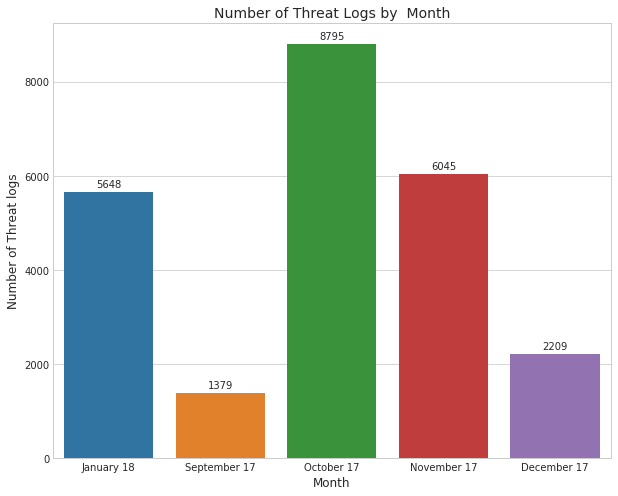

In [26]:
xtick=['January 18','September 17','October 17','November 17','December 17']
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Received_Time.dt.month)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center")
plt.xticks([0,1,2,3,4],xtick,size=10)
plt.title('Number of Threat Logs by  Month',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Month',size=12)
plt.show()

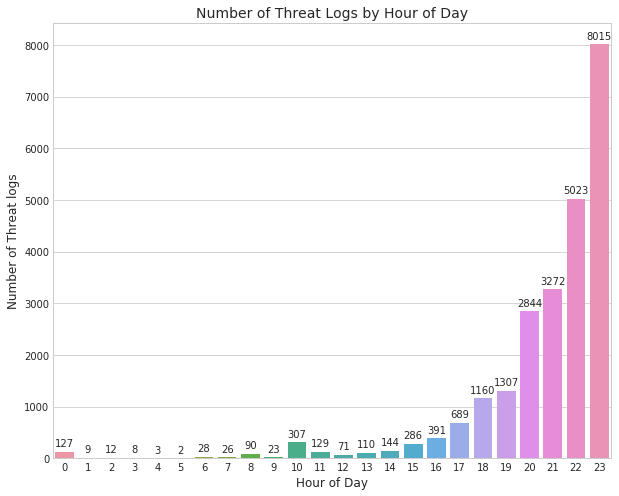

In [27]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Received_Time.dt.hour)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center")
plt.title('Number of Threat Logs by Hour of Day',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Hour of Day',size=12)
plt.show()

In [28]:
threat_logs=threat_logs[threat_logs.Severity!='mediu']
threat_logs=threat_logs[threat_logs.Severity!='medium;93b2016a0a4cefc0069d5f3c326c31de1723511b9a73c1f180d02058edfcbe42;4436bb6c93fb709f33aa9f3c0f2e9c8fb39fb858a9ac12478a3990ecc812aa73']
threat_logs=threat_logs[threat_logs.Severity!='medium;9665ca70ac126333b39c9233544383feda8bee12aa43f398a2ccb64a7ccbb7c7;4436bb6c93fb709f33aa9f3c0f2e9c8fb39fb858a9ac12478a3990ecc812aa73']

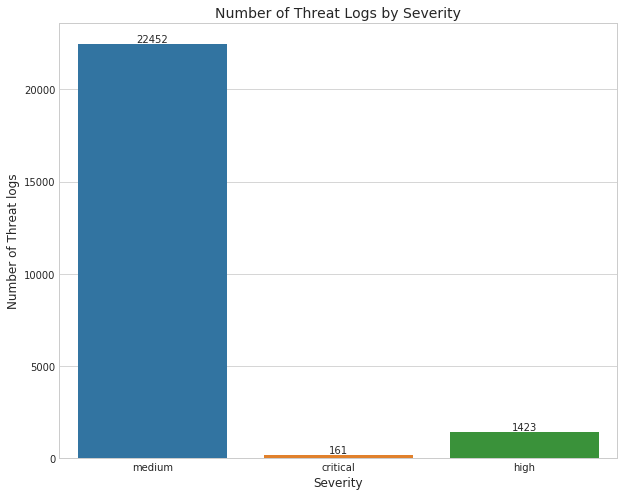

In [29]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Severity)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center")
plt.title('Number of Threat Logs by Severity',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Severity',size=12)
plt.show()

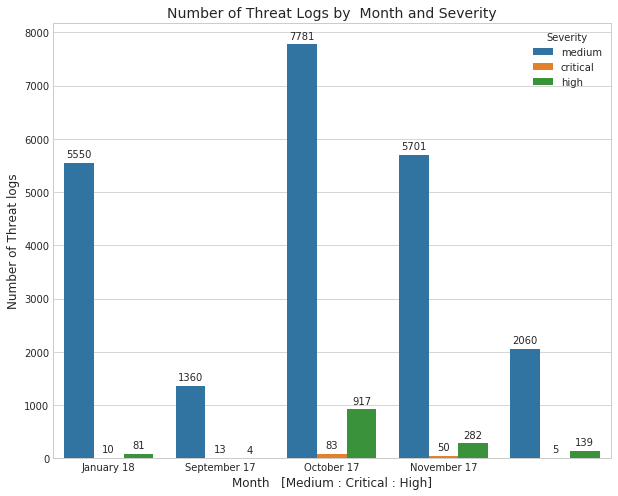

In [30]:
xtick=['January 18','September 17','October 17','November 17','December 17']
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Received_Time.dt.month,hue=threat_logs.Severity)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center") 
    
plt.xticks([0,1,2,3],xtick,size=10)
plt.title('Number of Threat Logs by  Month and Severity',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Month   [Medium : Critical : High]',size=12)
plt.show()

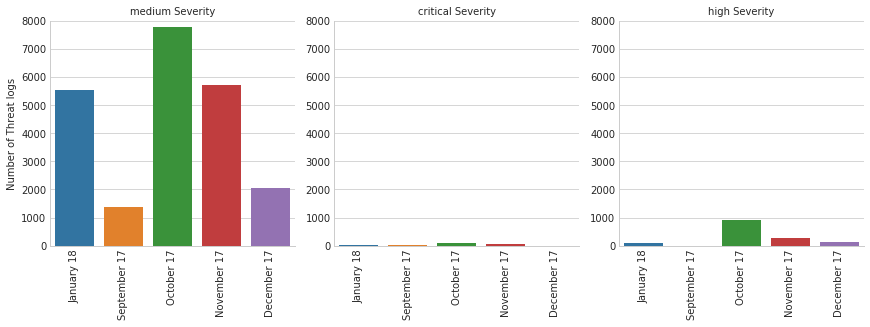

In [31]:
threat_logs['month']=threat_logs.Received_Time.dt.month
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.factorplot(x='month',col='Severity',data=threat_logs,kind='count',size=4)
ax.set_titles("{col_name} {col_var}")
ax.set_xticklabels(['January 18','September 17','October 17','November 17','December 17'],rotation=90)
ax.set_axis_labels("",'Number of Threat logs')
ax.set(ylim=(0, 8000))
plt.show()

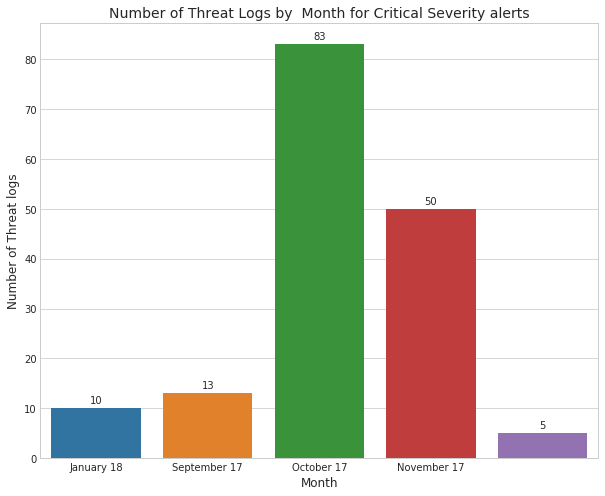

In [32]:
a=threat_logs[threat_logs.Severity=='critical']
xtick=['January 18','September 17','October 17','November 17','December 17']
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=a.Received_Time.dt.month)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 1,'{:1d}'.format(height),ha="center") 
    
plt.xticks([0,1,2,3],xtick,size=10)
plt.title('Number of Threat Logs by  Month for Critical Severity alerts',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Month',size=12)
plt.show()

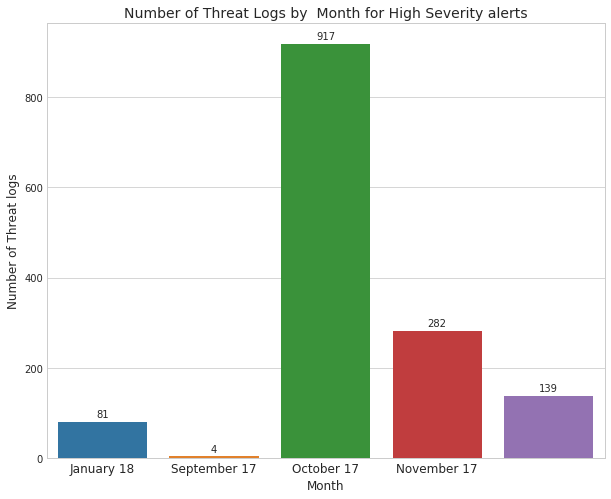

In [33]:
a=threat_logs[threat_logs.Severity=='high']
xtick=['January 18','September 17','October 17','November 17','December 17']
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=a.Received_Time.dt.month)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 10,'{:1d}'.format(height),ha="center") 
    
plt.xticks([0,1,2,3],xtick,size=12)
plt.xticks(size=12)
plt.title('Number of Threat Logs by  Month for High Severity alerts',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Month',size=12)
plt.show()

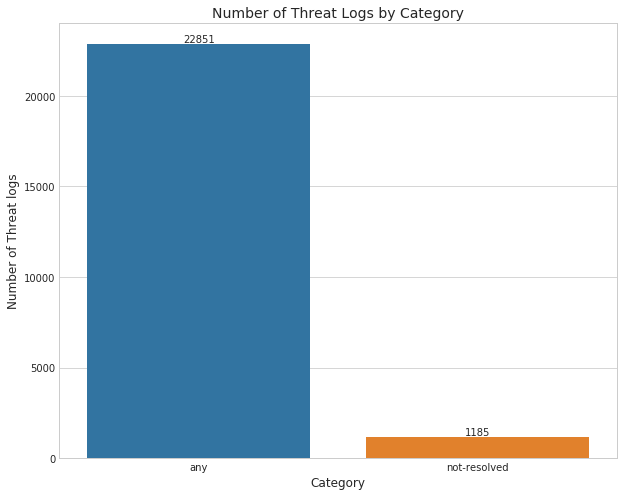

In [34]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Category)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center")
plt.title('Number of Threat Logs by Category',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Category',size=12)
plt.show()

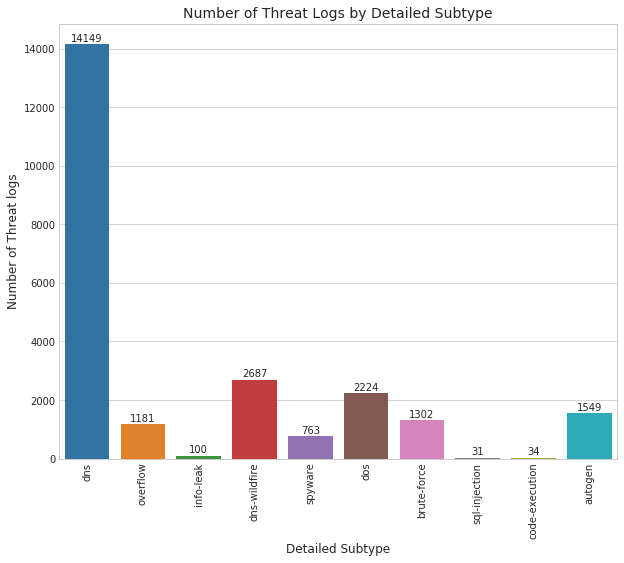

In [35]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Detailed_Subtype)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center")
plt.title('Number of Threat Logs by Detailed Subtype',size=14)
plt.xticks(rotation=90)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Detailed Subtype',size=12)
plt.show()

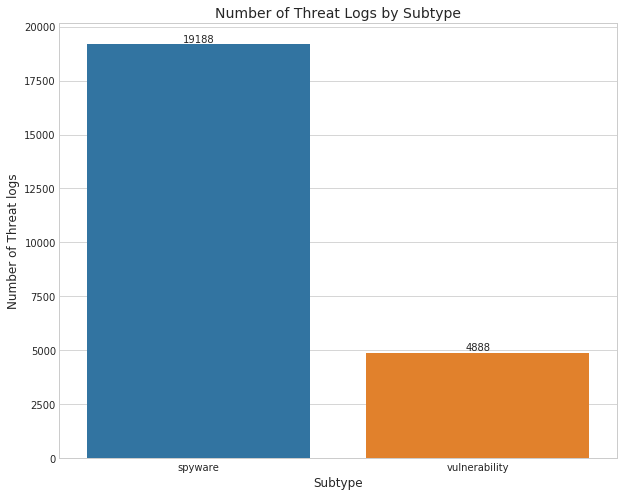

In [36]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.countplot(x=threat_logs.Subtype)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 100,'{:1d}'.format(height),ha="center")
plt.title('Number of Threat Logs by Subtype',size=14)
plt.ylabel('Number of Threat logs',size=12)
plt.xlabel('Subtype',size=12)
plt.show()

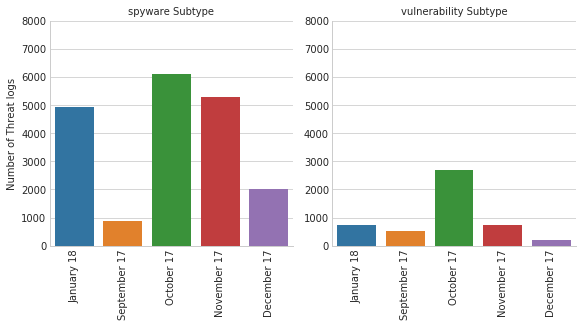

In [37]:
threat_logs['month']=threat_logs.Received_Time.dt.month

plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.factorplot(x='month',col='Subtype',data=threat_logs,kind='count',size=4)
ax.set_titles("{col_name} {col_var}")
ax.set_xticklabels(['January 18','September 17','October 17','November 17','December 17'],rotation=90)
ax.set_axis_labels("",'Number of Threat logs')
ax.set(ylim=(0, 8000))
plt.show()

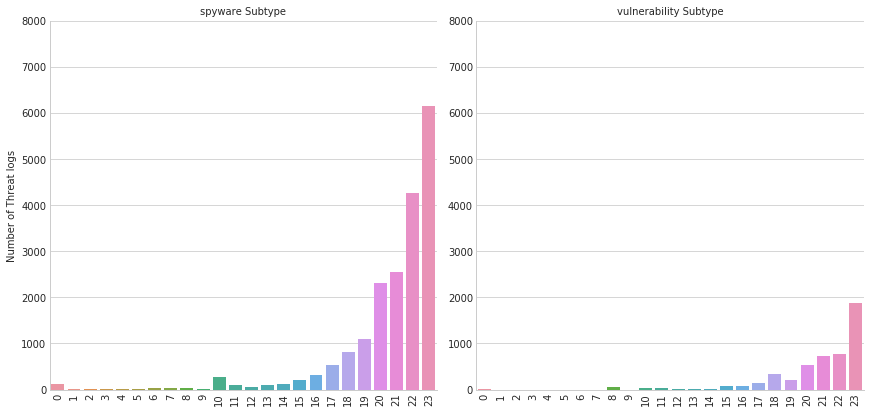

In [38]:
threat_logs['hour']=threat_logs.Received_Time.dt.hour

plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.factorplot(x='hour',col='Subtype',data=threat_logs,kind='count',size=6)
ax.set_titles("{col_name} {col_var}")
ax.set_axis_labels("",'Number of Threat logs')
ax.set(ylim=(0, 8000))
ax.set_xticklabels(rotation=90)
plt.show()

In [39]:
m=threat_logs.Received_Time.dt.date.value_counts(sort=False,ascending=False)

q=pd.DataFrame(m).reset_index()

m=q.sort_values(by='index').reset_index(drop=True)

m['index']=pd.to_datetime(m['index'])


print("Average number of threat logs per day for September",sum(m[m['index'].dt.month==9]['Received_Time'])/len(m[m['index'].dt.month==9]))

print("Average number of threat logs per day for October  ",sum(m[m['index'].dt.month==10]['Received_Time'])/len(m[m['index'].dt.month==10]))

print("Average number of threat logs per day for November ",sum(m[m['index'].dt.month==11]['Received_Time'])/len(m[m['index'].dt.month==11]))

print("Average number of threat logs per day for December ",sum(m[m['index'].dt.month==12]['Received_Time'])/len(m[m['index'].dt.month==12]))

print("Average number of threat logs per day for January  ",sum(m[m['index'].dt.month==1]['Received_Time'])/len(m[m['index'].dt.month==1]))


Average number of threat logs per day for September 275.8
Average number of threat logs per day for October   283.709677419
Average number of threat logs per day for November  201.5
Average number of threat logs per day for December  100.409090909
Average number of threat logs per day for January   217.230769231


In [68]:
d=pd.DataFrame(threat_logs.Source_User.value_counts())
d.reset_index(inplace=True,drop=False)
d.columns=['Source_User','Count']
d_le1=d[d.Count==1]
d_ge1=d[d.Count>1]

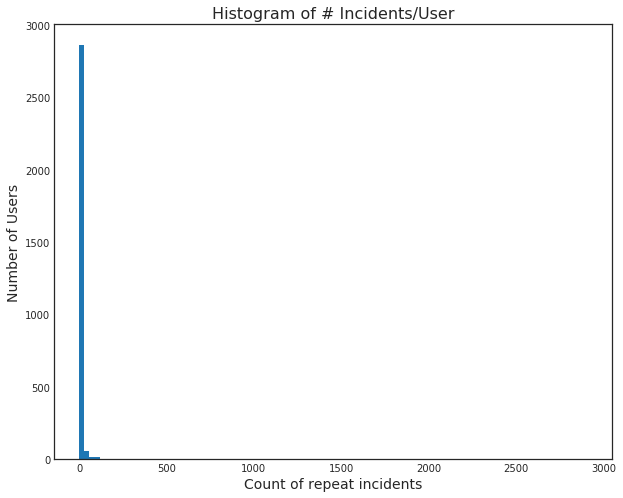

In [77]:
plt.figure(figsize=(10,8))
sns.set_style('white')
plt.hist(d.Count,bins=100)
plt.title('Histogram of # Incidents/User',size=16)
plt.xlabel('Count of repeat incidents',size=14)
plt.ylabel('Number of Users',size=14)
plt.show()

In [78]:
print("Only {} users  have more than 20 threat incidents\nOnly {} users have more than 50 threat incidents\nOnly {} users have more than 100 threat incidents"
      .format(sum(d.Count>20),sum(d.Count>50),sum(d.Count>100)))

Only 157 users  have more than 20 threat incidents
Only 64 users have more than 50 threat incidents
Only 27 users have more than 100 threat incidents


Lets plot the histogram for users with less than 50 incidents


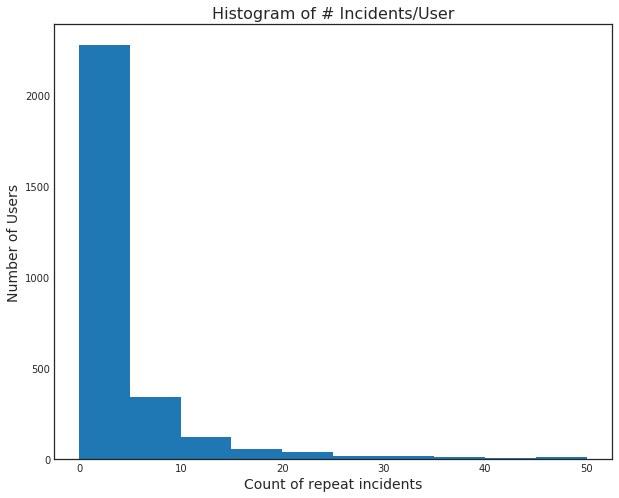

In [81]:
print("Lets plot the histogram for users with less than 50 incidents")
plt.figure(figsize=(10,8))
sns.set_style('white')
plt.hist(d.Count,range=[0,50])
plt.title('Histogram of # Incidents/User',size=16)
plt.xlabel('Count of repeat incidents',size=14)
plt.ylabel('Number of Users',size=14)
plt.show()

In [82]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Severity]).count().unstack().fillna(0)['Subtype']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c.critical+c.high+c.medium
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)
x=c[c.Count<=1]
y=c[c.Count>1]

In [83]:
print("The table below illustrates the number of incidents for Users with 1 incident in the threat logs by Severity")
print("\n-----------------------------------------------------------------------------------------------------------\n")
print(tabulate(x[['Source_User','critical','high','medium']],headers=['Source User','Critical','High','Medium'],tablefmt='grid'))

The table below illustrates the number of incidents for Users with 1 incident in the threat logs by Severity

-----------------------------------------------------------------------------------------------------------

+------+------------------------------------------------------------------+------------+--------+----------+
|      | Source User                                                      |   Critical |   High |   Medium |
+======+==================================================================+============+========+==========+
| 1637 | f56d89500148f4bd6c7875bf190e55e371a4dc65cff37fb2ca128eb3c800b766 |          0 |      0 |        1 |
+------+------------------------------------------------------------------+------------+--------+----------+
| 1638 | 12daff2174fe91929c1a467f9bdcdd9cfea54465efa6004b3e50020fc429f966 |          0 |      0 |        1 |
+------+------------------------------------------------------------------+------------+--------+----------+
| 1639 | bf902541d

In [84]:
print("Summary table for users with 1 incident by severity")
z=pd.DataFrame(x.sum())
print(tabulate([{'Critical':x.critical.sum(),'High':x.high.sum(),'Medium':x.medium.sum()}],
               headers={'Critical':'Critical','High':'High','Medium':'Medium'},tablefmt='grid'))

Summary table for users with 1 incident by severity
+------------+--------+----------+
|   Critical |   High |   Medium |
+============+========+==========+
|          9 |     20 |     1291 |
+------------+--------+----------+


In [85]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Subtype]).count().unstack().fillna(0)['Severity']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c.spyware+c.vulnerability
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)
x=c[c.Count<=1]
y=c[c.Count>1]

In [86]:
print("The table below illustrates the number of incidents for Users with 1 incident in the threat logs by Incident")
print("\n---------------------------------------------------------------------------------------------------------------------\n")
print(tabulate(x[['Source_User','spyware','vulnerability']],headers=['Source_User','spyware','vulnerability'],tablefmt='grid'))

The table below illustrates the number of incidents for Users with 1 incident in the threat logs by Incident

---------------------------------------------------------------------------------------------------------------------

+------+------------------------------------------------------------------+-----------+-----------------+
|      | Source_User                                                      |   spyware |   vulnerability |
+======+==================================================================+===========+=================+
| 1637 | 25cd0f77a8a048689aa84469f002d4d7e4d9b51d7f35223ac38fb2f5e17c9e94 |         1 |               0 |
+------+------------------------------------------------------------------+-----------+-----------------+
| 1638 | 256e98dea8c38cd4872ed8b0bf88430459b27d0849ff68bf18d1c1f9a33a8f4d |         1 |               0 |
+------+------------------------------------------------------------------+-----------+-----------------+
| 1639 | c250832ce725867d5b1a

In [87]:
print("Summary table for users with 1 incident by type of incident")
z=pd.DataFrame(x.sum())
print(tabulate([{'Spyware':x.spyware.sum(),'Vulnerability':x.vulnerability.sum()}],
               headers={'Spyware':'Spyware','Vulnerability':'Vulnerability'},tablefmt='grid'))

Summary table for users with 1 incident by type of incident
+-----------+-----------------+
|   Spyware |   Vulnerability |
+===========+=================+
|      1281 |              39 |
+-----------+-----------------+


In [88]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Detailed_Subtype]).count().unstack().fillna(0)['Severity']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c[c.columns[1:]].sum(axis=1)
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)
x=c[c.Count<=1]
y=c[c.Count>1]

In [89]:
print("The table below illustrates the number of incidents for Users with 1 incident in the threat logs by Detailed Subtype")
print("\n---------------------------------------------------------------------------------------------------------------------\n")
x.iloc[:,:-1]

The table below illustrates the number of incidents for Users with 1 incident in the threat logs by Detailed Subtype

---------------------------------------------------------------------------------------------------------------------



Detailed_Subtype,Source_User,autogen,brute-force,code-execution,dns,dns-wildfire,dos,info-leak,overflow,spyware,sql-injection
1636,f30fda004cd55edeb5a1df31090b2f7bfd46365654af6c...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1637,f2f00fa4cc003ab87212398476f1d071af9873fc916189...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1638,04a7476a581aae16c447c37aa4850ad929678d9712a1e5...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1639,121afe7659ead7e55ab1cbbe12b312a30cc3caef5992b9...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,00ae1c88f804e5c64694f9a1373be5d3a0037de4c45874...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,f2ee40ea5e86f2d23906cb7d248b5668627e601375009e...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1642,c1c8d7c96a044a34952836651a2b03f9b2be573144ee90...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1643,1467db9757cb6c89042e801afb202ca13a8d0c8a33dc64...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,b83e2fed68cf0f835f01203d2fed8ee3c8fe52a8828585...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1645,fe1e9241fc3d049f708823deeee273b61af9da7d2d1bdb...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
print("Summary table for users with 1 incident by Detailed type of incident")
z=pd.DataFrame(x.sum())
print(tabulate([{'brute-force':x['brute-force'].sum(),'code-execution':x['code-execution'].sum(),
                 'dns':x['dns'].sum(),'dns-wildfire':x['dns-wildfire'].sum(), 'dos':x['dos'].sum(),
                 'info-leak':x['info-leak'].sum(), 'overflow':x['overflow'].sum(),'spyware':x['spyware'].sum(),
                 'sql-injection':x['sql-injection'].sum()}],
               headers={'brute-force':'brute-force','code-execution':'code-execution', 'dns':'dns',
                        'dns-wildfire':'dns-wildfire', 'dos':'dos', 'info-leak':'info-leak',
                        'overflow':'overflow', 'spyware':'spyware','sql-injection':'sql-injection'},tablefmt='grid'))

Summary table for users with 1 incident by Detailed type of incident
+---------------+------------------+-------+----------------+-------+-------------+------------+-----------+-----------------+
|   brute-force |   code-execution |   dns |   dns-wildfire |   dos |   info-leak |   overflow |   spyware |   sql-injection |
+===============+==================+=======+================+=======+=============+============+===========+=================+
|            17 |                2 |   946 |            264 |     4 |           7 |          6 |         2 |               3 |
+---------------+------------------+-------+----------------+-------+-------------+------------+-----------+-----------------+


In [91]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Severity]).count().unstack().fillna(0)['Subtype']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c.critical+c.high+c.medium
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)
x=c[c.Count<=1]
y=c[c.Count>1]

In [92]:
print("Summary table for users with more than 1 incident by severity in Percentage")
z=pd.DataFrame(y.sum())
print(tabulate([{'Critical':y.critical.sum(),'High':y.high.sum(),'Medium':y.medium.sum()}],
               headers={'Critical':'Critical','High':'High','Medium':'Medium'},tablefmt='grid'))

Summary table for users with more than 1 incident by severity in Percentage
+------------+--------+----------+
|   Critical |   High |   Medium |
+============+========+==========+
|        152 |   1403 |    21161 |
+------------+--------+----------+


In [93]:
y.critical=y.critical/(y.Count)
y.medium=y.medium/(y.Count)
y.high=y.high/(y.Count)
print("The table below illustrates the percetange of incidents for Users with more than 1 incident in the threat logs by Severity")
print("\n-----------------------------------------------------------------------------------------------------------\n")
print(tabulate(y[['Source_User','critical','high','medium']],headers=['Source User','Critical %','High %','Medium %'],tablefmt='grid'))

The table below illustrates the percetange of incidents for Users with more than 1 incident in the threat logs by Severity

-----------------------------------------------------------------------------------------------------------

+------+------------------------------------------------------------------+--------------+-----------+------------+
|      | Source User                                                      |   Critical % |    High % |   Medium % |
+======+==================================================================+==============+===========+============+
|    0 | e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab |   0.00206825 | 0.0448121 |  0.95312   |
+------+------------------------------------------------------------------+--------------+-----------+------------+
|    1 | b5a502c0d5250f6fd302492ad4d6f33473e6991ac95080f0815ee3613613558a |   0          | 0         |  1         |
+------+---------------------------------------------------------------

In [94]:
print("The correlation between Severity:")
corr=y[['critical','high','medium']].corr()
sns.axes_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True           

The correlation between Severity:


In [96]:
def ci(df,s):
    
    ya=[]
    for i in range(0,len(df.columns)):
        for j in range(0,len(df.columns)):
            xy=df.iloc[i,j]
            z=0.5*np.log((1+xy)/(1-xy))
            q=np.sqrt(1/(len(y)-3))
            r=z+q*s
            ul=(np.exp(2*(z+q*s))-1)/(np.exp(2*(z+q*s))+1)
            ll=(np.exp(2*(z-q*s))-1)/(np.exp(2*(z-q*s))+1)
            l,u=ll,ul
            ya.append((l,df.iloc[i,j],u))
    lower=[]
    for i in range(0,len(ya)):
        lower.append(ya[i][0])
    lower=np.array(lower).reshape(len(df.columns),len(df.columns))
    upper=[]
    for i in range(0,len(ya)):
        upper.append(ya[i][2])
    upper=np.array(upper).reshape(len(df.columns),len(df.columns))
    return lower,upper

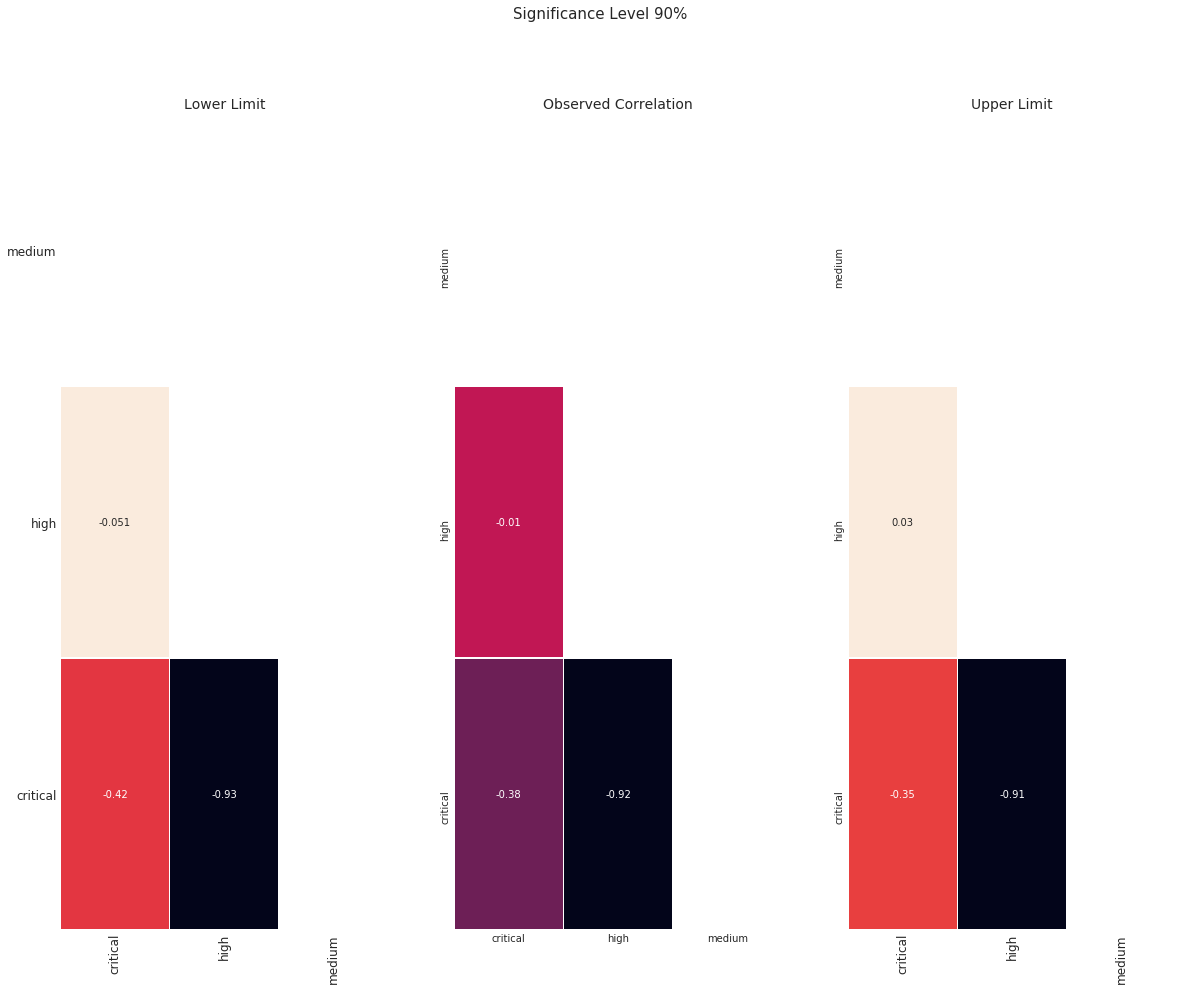

In [97]:
lower,upper=ci(corr,1.645)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,15))
sns.set_style('whitegrid')
sns.heatmap(data=lower,annot=lower,mask=mask,ax=ax1,cbar=False,linewidths=0.2)
sns.heatmap(data=corr,annot=corr,mask=mask,ax=ax2,cbar=False,linewidths=0.2)
sns.heatmap(data=upper,annot=upper,mask=mask,ax=ax3,cbar=False,linewidths=0.2)

plt.setp(ax1.set_yticklabels(corr.columns.get_values()[::-1]), visible=True)
plt.setp(ax2.set_ylabel([]),visible=False)
plt.setp(ax2.set_xlabel([]),visible=False)
plt.setp(ax1.yaxis.get_majorticklabels(),rotation=0,size=12)
plt.setp(ax1.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax3.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax3.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax1.set_title('Lower Limit'),visible=True,size=14)
plt.setp(ax2.set_title('Observed Correlation'),visible=True,size=14)
plt.setp(ax3.set_title('Upper Limit'),visible=True,size=14)
plt.suptitle("Significance Level 90%",size=15)

# ax0.tick_params(axis='y',labelsize=16)
# ax0.tick_params(axis='x',labelsize=16)
# ax0.set_ylabel("Detailed Subtype",size=18)
# ax0.set_xlabel("Day of Week",size=18)
# ax1.set_xticklabels(["Max incidents on"],size=16)
# ax0.set_title("Number of Threats each Day of Week for a given Month",size=22,loc="right",y=1.05,x=1.1)

plt.show()


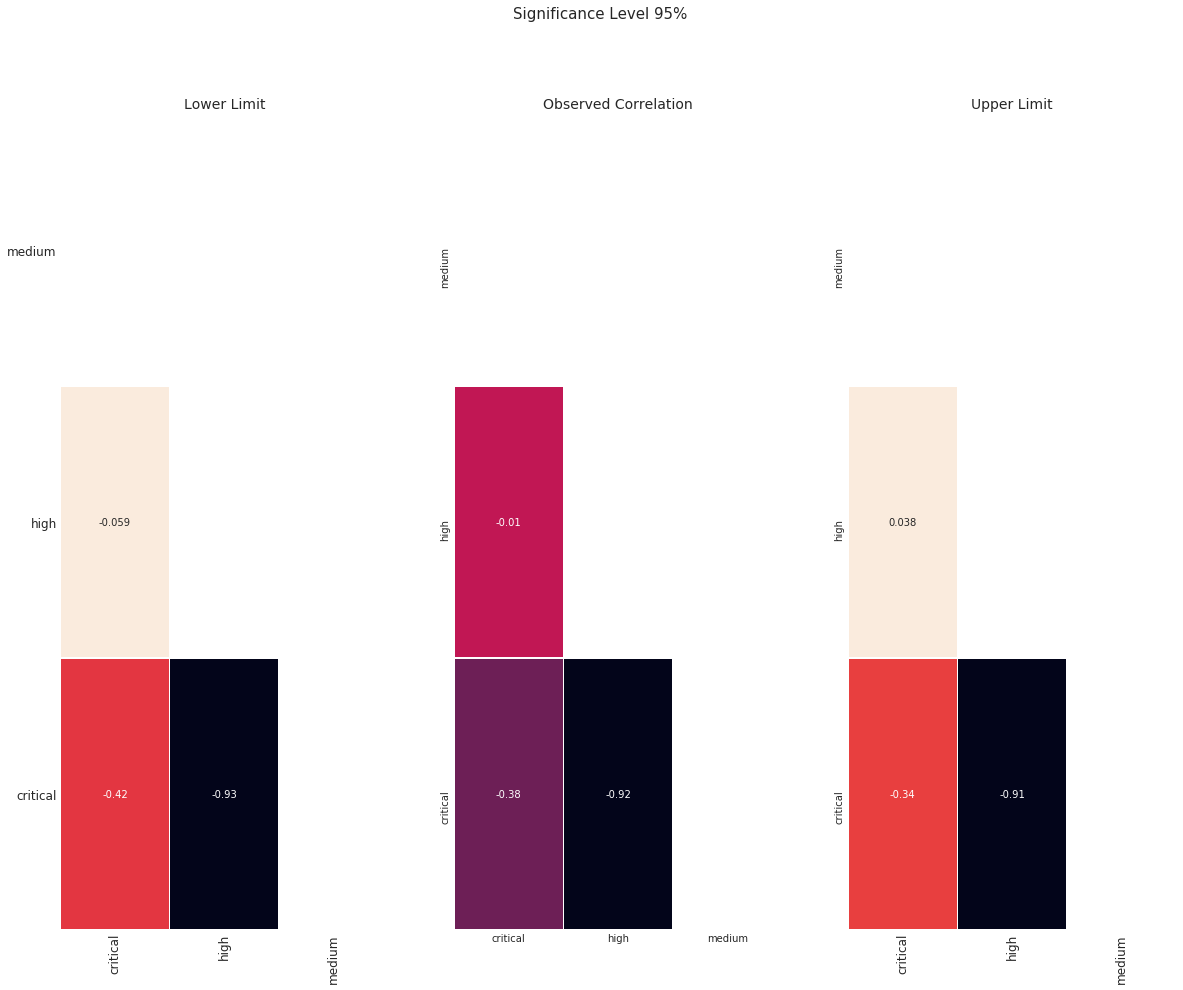

In [98]:
lower,upper=ci(corr,1.96)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,15))
sns.set_style('whitegrid')
sns.heatmap(data=lower,annot=lower,mask=mask,ax=ax1,cbar=False,linewidths=0.2)
sns.heatmap(data=corr,annot=corr,mask=mask,ax=ax2,cbar=False,linewidths=0.2)
sns.heatmap(data=upper,annot=upper,mask=mask,ax=ax3,cbar=False,linewidths=0.2)

plt.setp(ax1.set_yticklabels(corr.columns.get_values()[::-1]), visible=True)
plt.setp(ax2.set_ylabel([]),visible=False)
plt.setp(ax2.set_xlabel([]),visible=False)
plt.setp(ax1.yaxis.get_majorticklabels(),rotation=0,size=12)
plt.setp(ax1.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax3.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax3.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax1.set_title('Lower Limit'),visible=True,size=14)
plt.setp(ax2.set_title('Observed Correlation'),visible=True,size=14)
plt.setp(ax3.set_title('Upper Limit'),visible=True,size=14)
plt.suptitle("Significance Level 95%",size=15)

plt.show()


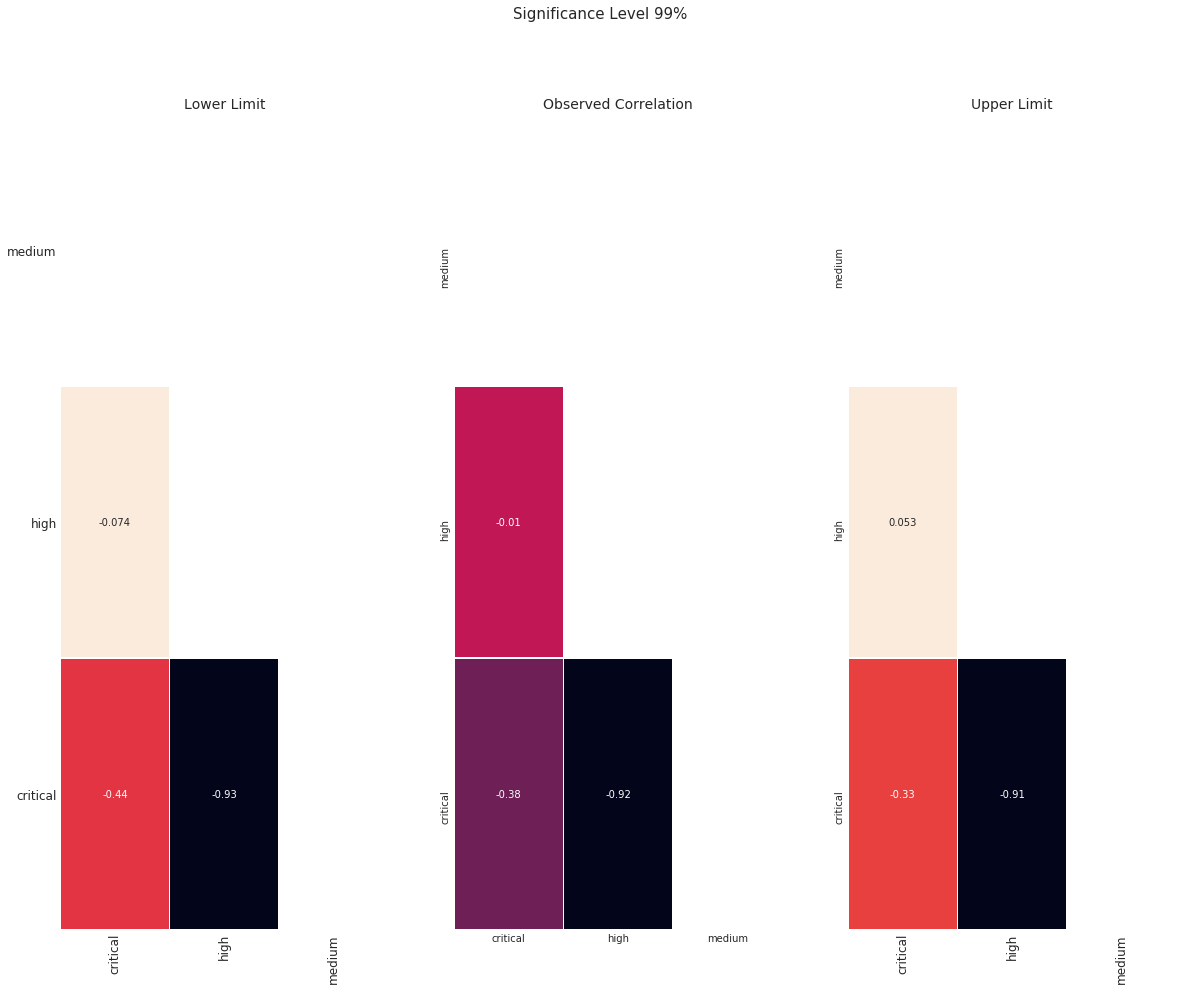

In [99]:
lower,upper=ci(corr,2.576)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,15))
sns.set_style('whitegrid')
sns.heatmap(data=lower,annot=lower,mask=mask,ax=ax1,cbar=False,linewidths=0.2)
sns.heatmap(data=corr,annot=corr,mask=mask,ax=ax2,cbar=False,linewidths=0.2)
sns.heatmap(data=upper,annot=upper,mask=mask,ax=ax3,cbar=False,linewidths=0.2)

plt.setp(ax1.set_yticklabels(corr.columns.get_values()[::-1]), visible=True)
plt.setp(ax2.set_ylabel([]),visible=False)
plt.setp(ax2.set_xlabel([]),visible=False)
plt.setp(ax1.yaxis.get_majorticklabels(),rotation=0,size=12)
plt.setp(ax1.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax3.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax3.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax1.set_title('Lower Limit'),visible=True,size=14)
plt.setp(ax2.set_title('Observed Correlation'),visible=True,size=14)
plt.setp(ax3.set_title('Upper Limit'),visible=True,size=14)
plt.suptitle("Significance Level 99%",size=15)


plt.show()


In [100]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Subtype]).count().unstack().fillna(0)['Severity']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c[c.columns[1:]].sum(axis=1)
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)
y=c[c.Count>1]

In [101]:
print("Summary table for users with more than 1 incident by type of incident in percentage")
z=pd.DataFrame(y.sum())
print(tabulate([{'Spyware':y.spyware.sum(),'Vulnerability':y.vulnerability.sum()}],
               headers={'Spyware':'Spyware','Vulnerability':'Vulnerability'},tablefmt='grid'))

Summary table for users with more than 1 incident by type of incident in percentage
+-----------+-----------------+
|   Spyware |   Vulnerability |
+===========+=================+
|     17881 |            4835 |
+-----------+-----------------+


In [102]:
y.spyware=y.spyware/(y.Count)
y.vulnerability=y.vulnerability/(y.Count)
print("The table below illustrates the percetange of incidents for Users with more than 1 incident in the threat logs by Incident")
print("\n-----------------------------------------------------------------------------------------------------------\n")
print(tabulate(y[['Source_User','spyware','vulnerability']],headers=['Source User','Spyware %','Vulnerability %'],tablefmt='grid'))

The table below illustrates the percetange of incidents for Users with more than 1 incident in the threat logs by Incident

-----------------------------------------------------------------------------------------------------------

+------+------------------------------------------------------------------+-------------+-------------------+
|      | Source User                                                      |   Spyware % |   Vulnerability % |
+======+==================================================================+=============+===================+
|    0 | e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab |   0.953809  |         0.046191  |
+------+------------------------------------------------------------------+-------------+-------------------+
|    1 | b5a502c0d5250f6fd302492ad4d6f33473e6991ac95080f0815ee3613613558a |   1         |         0         |
+------+------------------------------------------------------------------+-------------+------------------

In [104]:
d=threat_logs.groupby([threat_logs.Source_User,threat_logs.Detailed_Subtype]).count().unstack().fillna(0)['Severity']
c=pd.DataFrame(d)
c.reset_index(inplace=True,drop=False)
c['Count']=c[c.columns[1:]].sum(axis=1)
c.sort_values(by='Count',ascending=False,inplace=True)
c.Count=c.Count.astype(int)
c.reset_index(inplace=True,drop=True)
y=c[c.Count>1]

In [105]:
print("Summary table for users with more than 1 incident by Detailed type of incident in percentages")
z=pd.DataFrame(y.sum())
print(tabulate([{'brute-force':y['brute-force'].sum(),'code-execution':y['code-execution'].sum(),
                 'dns':y['dns'].sum(),'dns-wildfire':y['dns-wildfire'].sum(), 'dos':y['dos'].sum(),
                 'info-leak':y['info-leak'].sum(), 'overflow':y['overflow'].sum(),'spyware':y['spyware'].sum(),
                 'sql-injection':y['sql-injection'].sum()}],
               headers={'brute-force':'bruteforce','code-execution':'codeexecution', 'dns':'dns',
                        'dns-wildfire':'dnswildfire', 'dos':'dos', 'info-leak':'info-leak',
                        'overflow':'overflow', 'spyware':'spyware','sql-injection':'sql-injection'},tablefmt='grid'))

Summary table for users with more than 1 incident by Detailed type of incident in percentages
+--------------+-----------------+-------+---------------+-------+-------------+------------+-----------+-----------------+
|   bruteforce |   codeexecution |   dns |   dnswildfire |   dos |   info-leak |   overflow |   spyware |   sql-injection |
+==============+=================+=======+===============+=======+=============+============+===========+=================+
|         1285 |              32 | 13203 |          2423 |  2220 |          93 |       1175 |       761 |              28 |
+--------------+-----------------+-------+---------------+-------+-------------+------------+-----------+-----------------+


In [106]:
b=y.columns.get_values()[:-1]
b=b[1:]
for i in range(0,len(b)):
    y[b[i]]=y[b[i]]/(y.Count)
print("Table below illustrates the percetange of incidents for Users with more than 1 incident in the threat logs by Detailed Subtype")
print("\n-------------------------------------------------------------------------------------------------------------------------------\n")
y.reset_index(drop=True,inplace=True)
y.iloc[0:5,:-1]

Table below illustrates the percetange of incidents for Users with more than 1 incident in the threat logs by Detailed Subtype

-------------------------------------------------------------------------------------------------------------------------------



Detailed_Subtype,Source_User,autogen,brute-force,code-execution,dns,dns-wildfire,dos,info-leak,overflow,spyware,sql-injection
0,e0027ef4773a01094339852b6b1207f38c22adbe46879a...,0.000690,0.043823,0.000345,0.727743,0.129400,0.001035,0.00069,0.0,0.095928,0.000345
1,b5a502c0d5250f6fd302492ad4d6f33473e6991ac95080...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
2,07a805db92f77828144af02c110b4107381c8608ff69cb...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
3,eb30caaced9156871a8c10b8f96924d1dd57bc3bfbcbf0...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000
4,64c7c7ab1002f853fec50dcb65b8d4ce104aa67df24a11...,0.004556,0.000000,0.000000,0.986333,0.009112,0.000000,0.00000,0.0,0.000000,0.000000


In [107]:
corr=y[['brute-force','code-execution', 'dns','dns-wildfire', 'dos', 'info-leak','overflow', 'spyware','sql-injection']].corr()
sns.axes_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True     

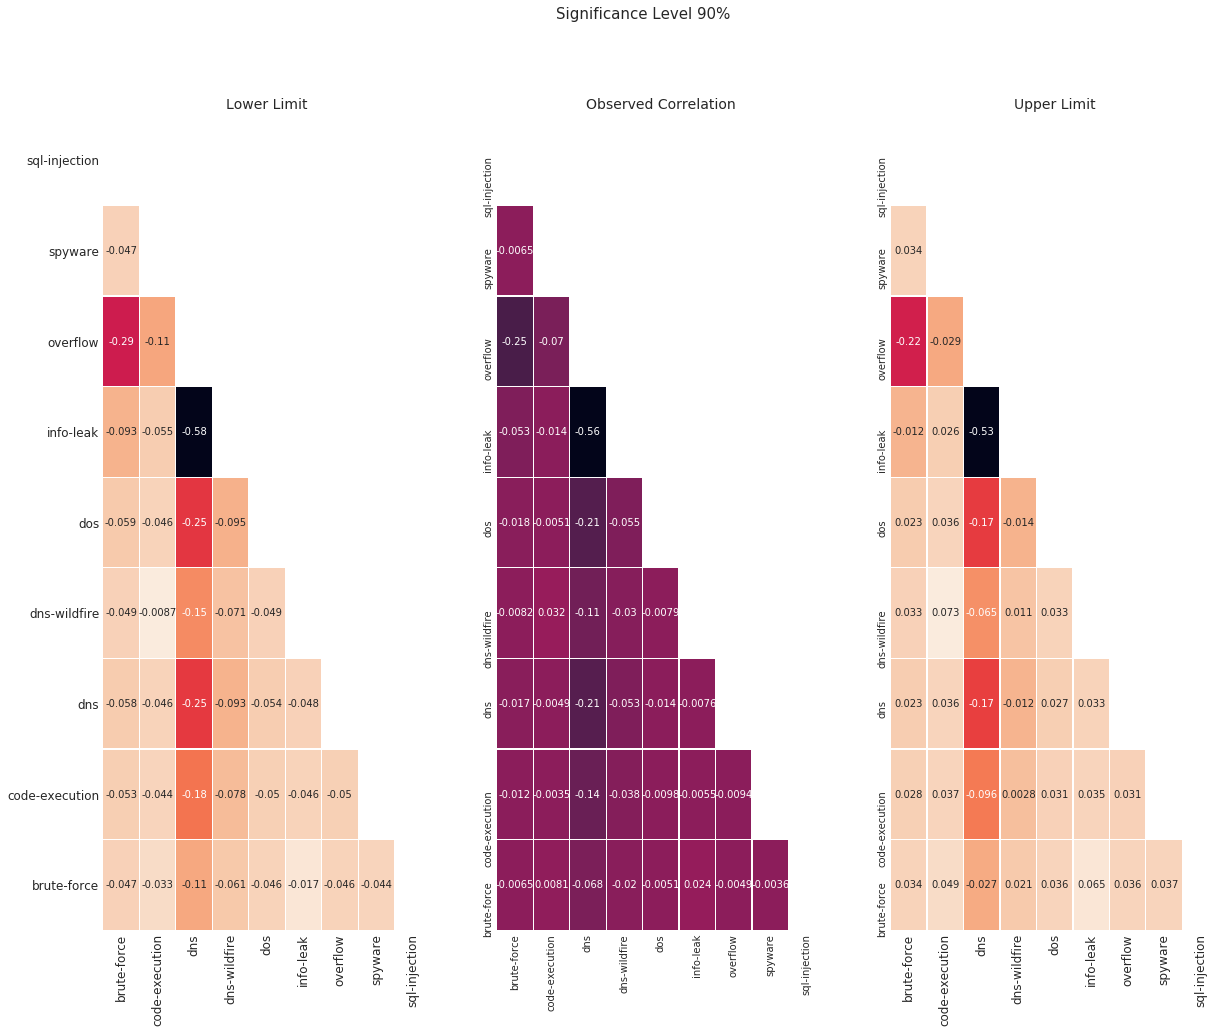

In [108]:
lower,upper=ci(corr,1.645)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,15))
sns.set_style('whitegrid')
sns.heatmap(data=lower,annot=lower,mask=mask,ax=ax1,cbar=False,linewidths=0.2)
sns.heatmap(data=corr,annot=corr,mask=mask,ax=ax2,cbar=False,linewidths=0.2)
sns.heatmap(data=upper,annot=upper,mask=mask,ax=ax3,cbar=False,linewidths=0.2)

plt.setp(ax1.set_yticklabels(corr.columns.get_values()[::-1]), visible=True)
plt.setp(ax2.set_ylabel([]),visible=False)
plt.setp(ax2.set_xlabel([]),visible=False)
plt.setp(ax1.yaxis.get_majorticklabels(),rotation=0,size=12)
plt.setp(ax1.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax3.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax3.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax1.set_title('Lower Limit'),visible=True,size=14)
plt.setp(ax2.set_title('Observed Correlation'),visible=True,size=14)
plt.setp(ax3.set_title('Upper Limit'),visible=True,size=14)
plt.suptitle("Significance Level 90%",size=15)


plt.show()


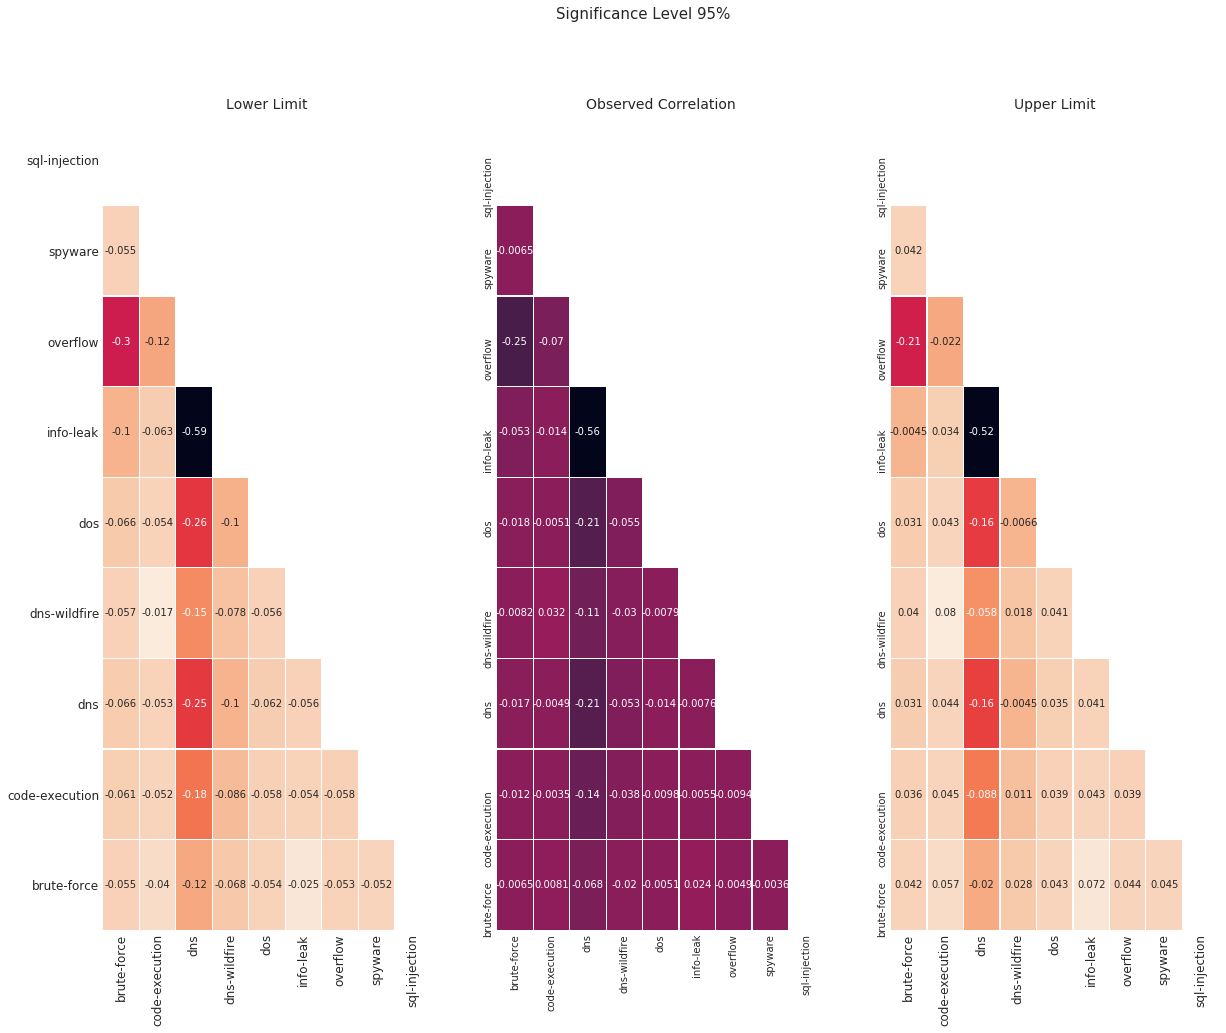

In [109]:
lower,upper=ci(corr,1.96)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,15))
sns.set_style('whitegrid')
sns.heatmap(data=lower,annot=lower,mask=mask,ax=ax1,cbar=False,linewidths=0.2)
sns.heatmap(data=corr,annot=corr,mask=mask,ax=ax2,cbar=False,linewidths=0.2)
sns.heatmap(data=upper,annot=upper,mask=mask,ax=ax3,cbar=False,linewidths=0.2)

plt.setp(ax1.set_yticklabels(corr.columns.get_values()[::-1]), visible=True)
plt.setp(ax2.set_ylabel([]),visible=False)
plt.setp(ax2.set_xlabel([]),visible=False)
plt.setp(ax1.yaxis.get_majorticklabels(),rotation=0,size=12)
plt.setp(ax1.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax3.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax3.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax1.set_title('Lower Limit'),visible=True,size=14)
plt.setp(ax2.set_title('Observed Correlation'),visible=True,size=14)
plt.setp(ax3.set_title('Upper Limit'),visible=True,size=14)
plt.suptitle("Significance Level 95%",size=15)

plt.show()


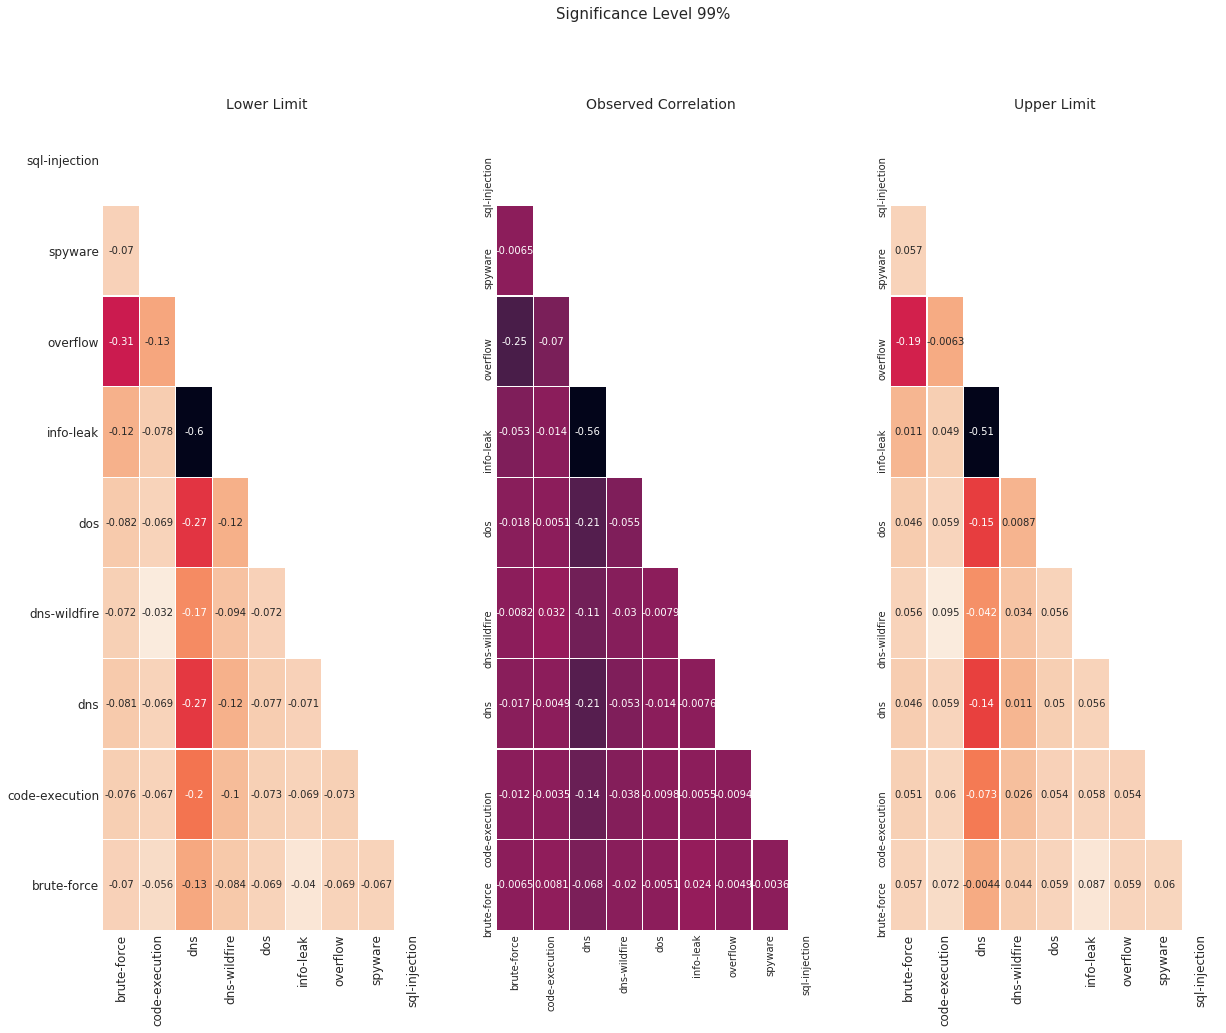

In [110]:
lower,upper=ci(corr,2.576)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,15))
sns.set_style('whitegrid')
sns.heatmap(data=lower,annot=lower,mask=mask,ax=ax1,cbar=False,linewidths=0.2)
sns.heatmap(data=corr,annot=corr,mask=mask,ax=ax2,cbar=False,linewidths=0.2)
sns.heatmap(data=upper,annot=upper,mask=mask,ax=ax3,cbar=False,linewidths=0.2)

plt.setp(ax1.set_yticklabels(corr.columns.get_values()[::-1]), visible=True)
plt.setp(ax2.set_ylabel([]),visible=False)
plt.setp(ax2.set_xlabel([]),visible=False)
plt.setp(ax1.yaxis.get_majorticklabels(),rotation=0,size=12)
plt.setp(ax1.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax3.set_xticklabels(corr.columns.get_values()),visible=True)
plt.setp(ax3.xaxis.get_majorticklabels(),rotation=90,size=12)
plt.setp(ax1.set_title('Lower Limit'),visible=True,size=14)
plt.setp(ax2.set_title('Observed Correlation'),visible=True,size=14)
plt.setp(ax3.set_title('Upper Limit'),visible=True,size=14)
plt.suptitle("Significance Level 99%",size=15)


plt.show()


In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')